In [ ]:
# Install the pandas library for data manipulation and analysis
!pip install pandas

# Install the numpy library for numerical computations
!pip install numpy

# Install the matplotlib library for data visualization
!pip install matplotlib

# Install the statsmodels library for statistical modeling
!pip install statsmodels

# Install the pandas_datareader library to read data from various online sources into pandas dataframes
!pip install pandas_datareader

# Install the datetime library for working with dates and times
!pip install datetime

# Install the yfinance library for accessing Yahoo Finance data
!pip install yfinance

# Install the scikit-learn library for machine learning
!pip install scikit-learn

# Install the PyPortfolioOpt library for portfolio optimization
!pip install PyPortfolioOpt

# Install the pandas-ta library for technical analysis indicators with pandas
!pip install pandas-ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 809.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 658.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e4ea32c049d26d4750d62e9272bd9640dbde60ff4c634f3c72434c4b3a6f419a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
# Import the RollingOLS function from statsmodels for rolling (moving window) ordinary least squares regression
from statsmodels.regression.rolling import RollingOLS

# Import the data module from pandas_datareader to fetch data from online sources
import pandas_datareader.data as web

# Import the pyplot module from matplotlib for plotting and visualizations
import matplotlib.pyplot as plt

# Import the main statsmodels module for statistical modeling
import statsmodels.api as sm

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computations
import numpy as np

# Import datetime as dt for working with date and time objects
import datetime as dt

# Import yfinance as yf to fetch financial data from Yahoo Finance
import yfinance as yf

# Import pandas_ta for technical analysis indicators using pandas
import pandas_ta

# Import the warnings module and set it to ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Read the CSV file
df = pd.read_csv('ind_nifty500list (1).csv')

# Access the specific column by its name and append .NS to each symbol
symbols_list = [symbol + '.NS' for symbol in df['Symbol'].unique().tolist()]

# List of symbols to be removed as its data is not availbale for the desired timeframe on yfin
symbols_to_remove = [
    'AEGISLOG.NS', 'UNITDSPR.NS', 'TATATECH.NS', 'HAPPYFORGE.NS',
    'JSWINFRA.NS', 'ARE&M.NS', 'DOMS.NS', 'CELLO.NS', 'SIGNATURE.NS',
    'HONASA.NS', 'DUMMYSANOF.NS'
]

# Remove the specified symbols from the list
symbols_list = [symbol for symbol in symbols_list if symbol not in symbols_to_remove]

# Display the resulting list of symbols
symbols_list



['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ACI.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAZEN.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'MAHABANK.NS',
 'BATAINDIA.NS',
 'BAYERCRO

In [ ]:
# Set the end date for the data retrieval
end_date = '2024-07-01'

# Calculate the start date by subtracting 8 years (365 days * 8) from the end date
start_date = pd.to_datetime(end_date) - pd.DateOffset(365 * 8)

#df = yf.download(tickers = "TTML.NS", start=start_date, end=end_date)

# Download the stock data for the list of symbols from Yahoo Finance within the date range
df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

# Rename the index levels for better clarity
df.index.names = ['date', 'ticker']

# Convert the column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Display the resulting DataFrame
df.dropna(inplace=True)
df

[*********************100%%**********************]  491 of 491 completed


Price                        adj close         close          high  \
date       ticker                                                    
2016-07-04 3MINDIA.NS     13402.561523  13986.849609  14270.950195   
           AARTIIND.NS      127.168320    130.317810    132.188858   
           ABB.NS          1059.194336   1103.320679   1119.752930   
           ABBOTINDIA.NS   4480.882324   4745.750000   4815.000000   
           ABFRL.NS         141.695419    141.695419    148.743225   
...                                ...           ...           ...   
2024-06-28 ZEEL.NS          151.789993    151.789993    154.899994   
           ZENSARTECH.NS    747.349976    747.349976    750.950012   
           ZFCVINDIA.NS   15551.200195  15551.200195  15930.000000   
           ZOMATO.NS        200.559998    200.559998    203.919998   
           ZYDUSLIFE.NS    1073.949951   1073.949951   1085.000000   

Price                              low          open      volume  
date       ticker                                                 
2016-07-04 3MINDIA.NS     13286.000000  13640.000000      4030.0  
           AARTIIND.NS      128.057953    128.531799    100944.0  
           ABB.NS          1102.231201   1109.902710     36965.0  
           ABBOTINDIA.NS   4701.000000   4734.399902      2013.0  
           ABFRL.NS         140.019714    147.856079    696583.0  
...                                ...           ...         ...  
2024-06-28 ZEEL.NS          150.750000    152.850006  16504456.0  
           ZENSARTECH.NS    735.950012    744.700012    522382.0  
           ZFCVINDIA.NS   15440.000000  15593.900391     20535.0  
           ZOMATO.NS        199.100006    201.300003  37287397.0  
           ZYDUSLIFE.NS    1060.500000   1063.000000   2188481.0  

[837545 rows x 6 columns]

In [ ]:
# Calculate the Garman-Klass volatility for each row and store it in a new column 'garman_klass_vol'
# This is a measure of stock price volatility that uses high, low, open, and close prices
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2 * np.log(2) - 1) * ((np.log(df['adj close']) - np.log(df['open']))**2)

# Calculate the Relative Strength Index (RSI) for each stock and store it in a new column 'rsi'
# RSI is a momentum oscillator that measures the speed and change of price movements
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

# Calculate the lower Bollinger Band for each stock and store it in a new column 'bb_low'
# Bollinger Bands are volatility bands placed above and below a moving average
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0])

# Calculate the middle Bollinger Band (moving average) for each stock and store it in a new column 'bb_mid'
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 1])

# Calculate the upper Bollinger Band for each stock and store it in a new column 'bb_high'
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 2])

# Define a function to compute the Average True Range (ATR) for a given stock's data
# ATR is a measure of volatility introduced by market technician J. Welles Wilder Jr.
def compute_atr(stock_data):
    # Calculate the ATR using high, low, and close prices over a 14-day period
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    # Normalize the ATR by subtracting its mean and dividing by its standard deviation
    return atr.sub(atr.mean()).div(atr.std())

# Apply the compute_atr function to each stock in the DataFrame and store the result in a new column 'atr'
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-07-04 3MINDIA.NS     13402.561523  13986.849609  14270.950195   
           AARTIIND.NS      127.168320    130.317810    132.188858   
           ABB.NS          1059.194336   1103.320679   1119.752930   
           ABBOTINDIA.NS   4480.882324   4745.750000   4815.000000   
           ABFRL.NS         141.695419    141.695419    148.743225   
...                                ...           ...           ...   
2024-06-28 ZEEL.NS          151.789993    151.789993    154.899994   
           ZENSARTECH.NS    747.349976    747.349976    750.950012   
           ZFCVINDIA.NS   15551.200195  15551.200195  15930.000000   
           ZOMATO.NS        200.559998    200.559998    203.919998   
           ZYDUSLIFE.NS    1073.949951   1073.949951   1085.000000   

Price                              low          open      volume  \
date       ticker                                                  
2016-07-04 3MINDIA.NS     13286.000000  13640.000000      4030.0   
           AARTIIND.NS      128.057953    128.531799    100944.0   
           ABB.NS          1102.231201   1109.902710     36965.0   
           ABBOTINDIA.NS   4701.000000   4734.399902      2013.0   
           ABFRL.NS         140.019714    147.856079    696583.0   
...                                ...           ...         ...   
2024-06-28 ZEEL.NS          150.750000    152.850006  16504456.0   
           ZENSARTECH.NS    735.950012    744.700012    522382.0   
           ZFCVINDIA.NS   15440.000000  15593.900391     20535.0   
           ZOMATO.NS        199.100006    201.300003  37287397.0   
           ZYDUSLIFE.NS    1060.500000   1063.000000   2188481.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-07-04 3MINDIA.NS             0.002438        NaN       NaN       NaN   
           AARTIIND.NS            0.000460        NaN       NaN       NaN   
           ABB.NS                -0.000720        NaN       NaN       NaN   
           ABBOTINDIA.NS         -0.000883        NaN       NaN       NaN   
           ABFRL.NS               0.001127        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2024-06-28 ZEEL.NS                0.000350  49.696020  4.960549  5.051759   
           ZENSARTECH.NS          0.000199  67.934312  6.377515  6.539293   
           ZFCVINDIA.NS           0.000485  48.742191  9.626695  9.718885   
           ZOMATO.NS              0.000281  59.216694  5.149084  5.243876   
           ZYDUSLIFE.NS           0.000220  55.070090  6.919074  6.972644   

Price                      bb_high       atr  
date       ticker                             
2016-07-04 3MINDIA.NS          NaN       NaN  
           AARTIIND.NS         NaN       NaN  
           ABB.NS              NaN       NaN  
           ABBOTINDIA.NS       NaN       NaN  
           ABFRL.NS            NaN       NaN  
...                            ...       ...  
2024-06-28 ZEEL.NS        5.142969 -1.282181  
           ZENSARTECH.NS  6.701071  2.527709  
           ZFCVINDIA.NS   9.811076  3.554317  
           ZOMATO.NS      5.338668  1.427488  
           ZYDUSLIFE.NS   7.026215  3.546794  

[837545 rows x 12 columns]

In [ ]:
# Define a function to compute the normalized MACD (Moving Average Convergence Divergence) for a given series of closing prices
def compute_macd(close):
    # Calculate the MACD using a default fast period of 12, slow period of 26, and signal period of 9
    macd = pandas_ta.macd(close=close, length=20).iloc[:, 0]
    # Normalize the MACD by subtracting its mean and dividing by its standard deviation
    return macd.sub(macd.mean()).div(macd.std())

# Apply the compute_macd function to each stock's adjusted closing prices in the DataFrame
# Store the result in a new column 'macd'
df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-07-04 3MINDIA.NS     13402.561523  13986.849609  14270.950195   
           AARTIIND.NS      127.168320    130.317810    132.188858   
           ABB.NS          1059.194336   1103.320679   1119.752930   
           ABBOTINDIA.NS   4480.882324   4745.750000   4815.000000   
           ABFRL.NS         141.695419    141.695419    148.743225   
...                                ...           ...           ...   
2024-06-28 ZEEL.NS          151.789993    151.789993    154.899994   
           ZENSARTECH.NS    747.349976    747.349976    750.950012   
           ZFCVINDIA.NS   15551.200195  15551.200195  15930.000000   
           ZOMATO.NS        200.559998    200.559998    203.919998   
           ZYDUSLIFE.NS    1073.949951   1073.949951   1085.000000   

Price                              low          open      volume  \
date       ticker                                                  
2016-07-04 3MINDIA.NS     13286.000000  13640.000000      4030.0   
           AARTIIND.NS      128.057953    128.531799    100944.0   
           ABB.NS          1102.231201   1109.902710     36965.0   
           ABBOTINDIA.NS   4701.000000   4734.399902      2013.0   
           ABFRL.NS         140.019714    147.856079    696583.0   
...                                ...           ...         ...   
2024-06-28 ZEEL.NS          150.750000    152.850006  16504456.0   
           ZENSARTECH.NS    735.950012    744.700012    522382.0   
           ZFCVINDIA.NS   15440.000000  15593.900391     20535.0   
           ZOMATO.NS        199.100006    201.300003  37287397.0   
           ZYDUSLIFE.NS    1060.500000   1063.000000   2188481.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-07-04 3MINDIA.NS             0.002438        NaN       NaN       NaN   
           AARTIIND.NS            0.000460        NaN       NaN       NaN   
           ABB.NS                -0.000720        NaN       NaN       NaN   
           ABBOTINDIA.NS         -0.000883        NaN       NaN       NaN   
           ABFRL.NS               0.001127        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2024-06-28 ZEEL.NS                0.000350  49.696020  4.960549  5.051759   
           ZENSARTECH.NS          0.000199  67.934312  6.377515  6.539293   
           ZFCVINDIA.NS           0.000485  48.742191  9.626695  9.718885   
           ZOMATO.NS              0.000281  59.216694  5.149084  5.243876   
           ZYDUSLIFE.NS           0.000220  55.070090  6.919074  6.972644   

Price                      bb_high       atr      macd  
date       ticker                                       
2016-07-04 3MINDIA.NS          NaN       NaN       NaN  
           AARTIIND.NS         NaN       NaN       NaN  
           ABB.NS              NaN       NaN       NaN  
           ABBOTINDIA.NS       NaN       NaN       NaN  
           ABFRL.NS            NaN       NaN       NaN  
...                            ...       ...       ...  
2024-06-28 ZEEL.NS        5.142969 -1.282181  0.250080  
           ZENSARTECH.NS  6.701071  2.527709  3.654968  
           ZFCVINDIA.NS   9.811076  3.554317  0.367581  
           ZOMATO.NS      5.338668  1.427488  0.958980  
           ZYDUSLIFE.NS   7.026215  3.546794  0.856819  

[837545 rows x 13 columns]

In [ ]:
# Calculate the dollar volume for each row and store it in a new column 'dollar_volume'
# Dollar volume is calculated as the product of the adjusted closing price and the volume, divided by 1,000,000 to convert to millions
df['dollar_volume'] = (df['adj close'] * df['volume']) / 1e6

# Display the resulting DataFrame
df


Price                        adj close         close          high  \
date       ticker                                                    
2016-07-04 3MINDIA.NS     13402.561523  13986.849609  14270.950195   
           AARTIIND.NS      127.168320    130.317810    132.188858   
           ABB.NS          1059.194336   1103.320679   1119.752930   
           ABBOTINDIA.NS   4480.882324   4745.750000   4815.000000   
           ABFRL.NS         141.695419    141.695419    148.743225   
...                                ...           ...           ...   
2024-06-28 ZEEL.NS          151.789993    151.789993    154.899994   
           ZENSARTECH.NS    747.349976    747.349976    750.950012   
           ZFCVINDIA.NS   15551.200195  15551.200195  15930.000000   
           ZOMATO.NS        200.559998    200.559998    203.919998   
           ZYDUSLIFE.NS    1073.949951   1073.949951   1085.000000   

Price                              low          open      volume  \
date       ticker                                                  
2016-07-04 3MINDIA.NS     13286.000000  13640.000000      4030.0   
           AARTIIND.NS      128.057953    128.531799    100944.0   
           ABB.NS          1102.231201   1109.902710     36965.0   
           ABBOTINDIA.NS   4701.000000   4734.399902      2013.0   
           ABFRL.NS         140.019714    147.856079    696583.0   
...                                ...           ...         ...   
2024-06-28 ZEEL.NS          150.750000    152.850006  16504456.0   
           ZENSARTECH.NS    735.950012    744.700012    522382.0   
           ZFCVINDIA.NS   15440.000000  15593.900391     20535.0   
           ZOMATO.NS        199.100006    201.300003  37287397.0   
           ZYDUSLIFE.NS    1060.500000   1063.000000   2188481.0   

Price                     garman_klass_vol        rsi    bb_low    bb_mid  \
date       ticker                                                           
2016-07-04 3MINDIA.NS             0.002438        NaN       NaN       NaN   
           AARTIIND.NS            0.000460        NaN       NaN       NaN   
           ABB.NS                -0.000720        NaN       NaN       NaN   
           ABBOTINDIA.NS         -0.000883        NaN       NaN       NaN   
           ABFRL.NS               0.001127        NaN       NaN       NaN   
...                                    ...        ...       ...       ...   
2024-06-28 ZEEL.NS                0.000350  49.696020  4.960549  5.051759   
           ZENSARTECH.NS          0.000199  67.934312  6.377515  6.539293   
           ZFCVINDIA.NS           0.000485  48.742191  9.626695  9.718885   
           ZOMATO.NS              0.000281  59.216694  5.149084  5.243876   
           ZYDUSLIFE.NS           0.000220  55.070090  6.919074  6.972644   

Price                      bb_high       atr      macd  dollar_volume  
date       ticker                                                      
2016-07-04 3MINDIA.NS          NaN       NaN       NaN      54.012323  
           AARTIIND.NS         NaN       NaN       NaN      12.836879  
           ABB.NS              NaN       NaN       NaN      39.153119  
           ABBOTINDIA.NS       NaN       NaN       NaN       9.020016  
           ABFRL.NS            NaN       NaN       NaN      98.702620  
...                            ...       ...       ...            ...  
2024-06-28 ZEEL.NS        5.142969 -1.282181  0.250080    2505.211265  
           ZENSARTECH.NS  6.701071  2.527709  3.654968     390.402175  
           ZFCVINDIA.NS   9.811076  3.554317  0.367581     319.343896  
           ZOMATO.NS      5.338668  1.427488  0.958980    7478.360251  
           ZYDUSLIFE.NS   7.026215  3.546794  0.856819    2350.319063  

[837545 rows x 14 columns]

 Aggregate to monthly level and filter top 150 most liquid stocks for each month.
To reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency.

In [ ]:
# Define a list of columns to keep for further analysis, excluding specified columns
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

# Resample the 'dollar_volume' column to monthly frequency, taking the mean for each month
# Then, unstack the 'ticker' level of the index and convert it to a DataFrame
dollar_volume_monthly = df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

# Resample the specified columns to monthly frequency, taking the last value for each month
# Then, unstack the index and stack the 'ticker' level back
last_cols_monthly = df.unstack()[last_cols].resample('M').last().stack('ticker')

# Concatenate the two DataFrames along the columns, aligning on the index
# Drop rows with any missing values
data = pd.concat([dollar_volume_monthly, last_cols_monthly], axis=1).dropna()

# Display the resulting DataFrame
data


dollar_volume     adj close       atr   bb_high  \
date       ticker                                                           
2016-08-31 3MINDIA.NS         17.931384  12342.715820 -1.450947  9.474470   
           AARTIIND.NS        37.485492    146.896820 -1.368404  5.013345   
           ABB.NS             36.076235   1009.646606 -0.844181  6.972324   
           ABBOTINDIA.NS      12.035888   4433.090332 -1.255035  8.415940   
           ABFRL.NS          132.428052    153.474625 -0.234995  5.148265   
...                                 ...           ...       ...       ...   
2024-06-30 ZEEL.NS          3572.611294    151.789993 -1.282181  5.142969   
           ZENSARTECH.NS    1052.459881    747.349976  2.527709  6.701071   
           ZFCVINDIA.NS     1670.285437  15551.200195  3.554317  9.811076   
           ZOMATO.NS        8705.283396    200.559998  1.427488  5.338668   
           ZYDUSLIFE.NS     1600.679356   1073.949951  3.546794  7.026215   

                            bb_low    bb_mid  garman_klass_vol      macd  \
date       ticker                                                          
2016-08-31 3MINDIA.NS     9.413969  9.444219         -0.001397 -0.667837   
           AARTIIND.NS    4.881022  4.947184         -0.000351  0.175572   
           ABB.NS         6.893884  6.933104         -0.000446 -0.644157   
           ABBOTINDIA.NS  8.389209  8.402574         -0.001277 -0.333059   
           ABFRL.NS       4.942152  5.045209          0.002467  0.728546   
...                            ...       ...               ...       ...   
2024-06-30 ZEEL.NS        4.960549  5.051759          0.000350  0.250080   
           ZENSARTECH.NS  6.377515  6.539293          0.000199  3.654968   
           ZFCVINDIA.NS   9.626695  9.718885          0.000485  0.367581   
           ZOMATO.NS      5.149084  5.243876          0.000281  0.958980   
           ZYDUSLIFE.NS   6.919074  6.972644          0.000220  0.856819   

                                rsi  
date       ticker                    
2016-08-31 3MINDIA.NS     34.974563  
           AARTIIND.NS    65.733644  
           ABB.NS         37.102251  
           ABBOTINDIA.NS  46.378035  
           ABFRL.NS       52.583384  
...                             ...  
2024-06-30 ZEEL.NS        49.696020  
           ZENSARTECH.NS  67.934312  
           ZFCVINDIA.NS   48.742191  
           ZOMATO.NS      59.216694  
           ZYDUSLIFE.NS   55.070090  

[40347 rows x 9 columns]

Calculate 5-year rolling average of dollar volume for each stocks before filtering.

In [ ]:
# Calculate the rolling mean of the 'dollar_volume' over a 5-year window (5*12 months) with a minimum of 12 periods
# Unstack the 'ticker' level of the index, apply rolling mean, then stack the 'ticker' level back
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5 * 12, min_periods=12).mean().stack())

# Rank the 'dollar_volume' for each date in descending order
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

# Filter the data to keep only the top 150 ranked dollar volumes per date
# Drop the 'dollar_volume' and 'dollar_vol_rank' columns as they are no longer needed
data = data[data['dollar_vol_rank'] < 150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2017-07-31 ACC.NS         1575.535645 -0.618918  7.403154  7.264938  7.334046   
           ADANIENT.NS      73.950935 -0.794395  4.350591  4.275423  4.313007   
           ADANIPORTS.NS   379.839935 -1.084441  5.945277  5.857514  5.901395   
           ADANIPOWER.NS    33.500000 -0.700093  3.586131  3.332183  3.459157   
           AJANTPHARM.NS   878.638855 -0.983998  6.891162  6.776167  6.833665   
...                               ...       ...       ...       ...       ...   
2024-06-30 WIPRO.NS        514.849976  0.768615  6.264712  6.081319  6.173016   
           YESBANK.NS       23.690001 -0.819936  3.245317  3.154373  3.199845   
           ZEEL.NS         151.789993 -1.282181  5.142969  4.960549  5.051759   
           ZOMATO.NS       200.559998  1.427488  5.338668  5.149084  5.243876   
           ZYDUSLIFE.NS   1073.949951  3.546794  7.026215  6.919074  6.972644   

                          garman_klass_vol      macd        rsi  
date       ticker                                                
2017-07-31 ACC.NS                -0.003479  0.659271  61.899443  
           ADANIENT.NS            0.000007 -0.146282  56.893663  
           ADANIPORTS.NS         -0.000603  0.219587  71.930141  
           ADANIPOWER.NS          0.000227 -0.124211  62.305465  
           AJANTPHARM.NS         -0.001872 -1.180453  30.539483  
...                                    ...       ...        ...  
2024-06-30 WIPRO.NS               0.000197  1.409787  67.096434  
           YESBANK.NS             0.000233  0.130728  50.499474  
           ZEEL.NS                0.000350  0.250080  49.696020  
           ZOMATO.NS              0.000281  0.958980  59.216694  
           ZYDUSLIFE.NS           0.000220  0.856819  55.070090  

[12516 rows x 8 columns]

 Calculate Monthly Returns for different time horizons as features.
To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over various monthly periods as identified by lags.

In [ ]:
def calculate_returns(df):
    # Define the cutoff for outlier clipping
    outlier_cutoff = 0.005

    # Define a list of lag periods for calculating returns
    lags = [1, 2, 3, 6, 9, 12]

    # Loop through each lag period and calculate the corresponding returns
    for lag in lags:
        # Calculate the percentage change over the lag period
        returns = df['adj close'].pct_change(lag)

        # Clip the returns between specified quantiles to handle outliers
        clipped_returns = returns.clip(lower=returns.quantile(outlier_cutoff),
                                       upper=returns.quantile(1 - outlier_cutoff))

        # Apply the formula to adjust for the clipping and calculate the compounded returns
        adjusted_returns = clipped_returns.add(1).pow(1 / lag).sub(1)

        # Assign the calculated returns to a new column in the DataFrame
        df[f'return_{lag}m'] = adjusted_returns

    return df

# Apply the calculate_returns function to each group in the DataFrame based on the 'ticker' level
# Drop rows with any missing values
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

# Display the resulting DataFrame
data


adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                               
2018-07-31 ACC.NS         1420.754150  0.051463  7.283108  7.031428  7.157268   
           ADANIENT.NS     123.807610 -0.703061  4.983736  4.088980  4.536358   
           ADANIPORTS.NS   385.467102 -0.735407  5.967964  5.816803  5.892384   
           ADANIPOWER.NS    31.350000 -0.612105  3.506128  2.726431  3.116279   
           AMBUJACEM.NS    205.486801 -0.408361  5.327263  5.105994  5.216629   
...                               ...       ...       ...       ...       ...   
2024-06-30 WIPRO.NS        514.849976  0.768615  6.264712  6.081319  6.173016   
           YESBANK.NS       23.690001 -0.819936  3.245317  3.154373  3.199845   
           ZEEL.NS         151.789993 -1.282181  5.142969  4.960549  5.051759   
           ZOMATO.NS       200.559998  1.427488  5.338668  5.149084  5.243876   
           ZYDUSLIFE.NS   1073.949951  3.546794  7.026215  6.919074  6.972644   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2018-07-31 ACC.NS                -0.001080  1.109737  65.051666   0.141690   
           ADANIENT.NS            0.000672  0.020717  77.099792   0.696982   
           ADANIPORTS.NS          0.000713  0.169647  62.249438   0.076685   
           ADANIPOWER.NS          0.003045  0.032618  77.834535   0.939454   
           AMBUJACEM.NS          -0.002949  0.362302  64.879869   0.112075   
...                                    ...       ...        ...        ...   
2024-06-30 WIPRO.NS               0.000197  1.409787  67.096434   0.174920   
           YESBANK.NS             0.000233  0.130728  50.499474   0.030000   
           ZEEL.NS                0.000350  0.250080  49.696020   0.019409   
           ZOMATO.NS              0.000281  0.958980  59.216694   0.119509   
           ZYDUSLIFE.NS           0.000220  0.856819  55.070090   0.073789   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2018-07-31 ACC.NS          0.062685  -0.005113  -0.015380  -0.016145   
           ADANIENT.NS     0.272948   0.118552   0.013359   0.063819   
           ADANIPORTS.NS   0.012185  -0.004550  -0.010814  -0.007608   
           ADANIPOWER.NS   0.247330   0.068484  -0.025697  -0.004843   
           AMBUJACEM.NS    0.059799  -0.027268  -0.018090  -0.020029   
...                             ...        ...        ...        ...   
2024-06-30 WIPRO.NS        0.055192   0.023567   0.015200   0.026972   
           YESBANK.NS     -0.048198   0.006991   0.016693   0.035878   
           ZEEL.NS         0.016335   0.030890  -0.094134  -0.059859   
           ZOMATO.NS       0.019001   0.032709   0.083875   0.078610   
           ZYDUSLIFE.NS    0.061256   0.021569   0.076729   0.063900   

                          return_12m  
date       ticker                     
2018-07-31 ACC.NS          -0.008580  
           ADANIENT.NS      0.043879  
           ADANIPORTS.NS    0.001226  
           ADANIPOWER.NS   -0.005512  
           AMBUJACEM.NS    -0.009003  
...                              ...  
2024-06-30 WIPRO.NS         0.023782  
           YESBANK.NS       0.031912  
           ZEEL.NS         -0.012885  
           ZOMATO.NS        0.085362  
           ZYDUSLIFE.NS     0.053884  

[10048 rows x 14 columns]

Download Fama-French Factors and Calculate Rolling Factor Betas.
We will introduce the Fama—French data to estimate the exposure of assets to common risk factors using linear regression.

The five Fama—French factors, namely market risk, size, value, operating profitability, and investment have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.

We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

In [ ]:
# Import the DataReader function from pandas_datareader to fetch data from Fama-French databases
from pandas_datareader import DataReader as web

# Fetch the Fama-French 5 Factors 2x3 dataset from the Fama-French library starting from 2010
factor_data = web('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2010')[0]

# Drop the 'RF' (Risk-Free Rate) column from the dataset
factor_data = factor_data.drop('RF', axis=1)

# Convert the index of factor_data to timestamp format for consistency
factor_data.index = factor_data.index.to_timestamp()

# Resample the data to monthly frequency, taking the last observation for each month
factor_data = factor_data.resample('M').last()

# Divide the factor_data values by 100 to convert percentages to decimal format
factor_data = factor_data.div(100)

# Set the index name of factor_data to 'date' for better clarity
factor_data.index.name = 'date'

# Join the factor_data with the 'return_1m' column from the previously processed data DataFrame
factor_data = factor_data.join(data['return_1m'])

# Sort the index of factor_data for consistency
factor_data = factor_data.sort_index()

# Display the resulting factor_data DataFrame
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2018-07-31 ACC.NS         0.0319 -0.0193  0.0047  0.0156  0.0035   0.141690
           ADANIENT.NS    0.0319 -0.0193  0.0047  0.0156  0.0035   0.696982
           ADANIPORTS.NS  0.0319 -0.0193  0.0047  0.0156  0.0035   0.076685
           ADANIPOWER.NS  0.0319 -0.0193  0.0047  0.0156  0.0035   0.939454
           AMBUJACEM.NS   0.0319 -0.0193  0.0047  0.0156  0.0035   0.112075
...                          ...     ...     ...     ...     ...        ...
2024-05-31 WIPRO.NS       0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.052336
           YESBANK.NS     0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.120459
           ZEEL.NS        0.0434  0.0059 -0.0133  0.0321 -0.0287   0.013270
           ZOMATO.NS      0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.072483
           ZYDUSLIFE.NS   0.0434  0.0059 -0.0133  0.0321 -0.0287   0.048870

[9910 rows x 6 columns]

Filter out stocks with less than 10 months of data.

In [ ]:
# Count the number of observations for each ticker (level 1) in the factor_data DataFrame
observations = factor_data.groupby(level=1).size()

# Filter out tickers with fewer than 10 observations and keep only valid stocks
valid_stocks = observations[observations >= 10]

# Filter factor_data to keep only the tickers present in valid_stocks
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

# Display the resulting factor_data DataFrame with valid stocks
factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                          
2018-07-31 ACC.NS         0.0319 -0.0193  0.0047  0.0156  0.0035   0.141690
           ADANIENT.NS    0.0319 -0.0193  0.0047  0.0156  0.0035   0.696982
           ADANIPORTS.NS  0.0319 -0.0193  0.0047  0.0156  0.0035   0.076685
           ADANIPOWER.NS  0.0319 -0.0193  0.0047  0.0156  0.0035   0.939454
           AMBUJACEM.NS   0.0319 -0.0193  0.0047  0.0156  0.0035   0.112075
...                          ...     ...     ...     ...     ...        ...
2024-05-31 WIPRO.NS       0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.052336
           YESBANK.NS     0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.120459
           ZEEL.NS        0.0434  0.0059 -0.0133  0.0321 -0.0287   0.013270
           ZOMATO.NS      0.0434  0.0059 -0.0133  0.0321 -0.0287  -0.072483
           ZYDUSLIFE.NS   0.0434  0.0059 -0.0133  0.0321 -0.0287   0.048870

[9834 rows x 6 columns]

Calculate Rolling Factor Betas.

In [ ]:
# Define a lambda function to calculate rolling betas using RollingOLS from statsmodels
betas = (factor_data.groupby(level=1, group_keys=False)  # Group by ticker (level 1) without adding group keys
         .apply(lambda x:
                RollingOLS(endog=x['return_1m'],  # Endogenous variable is 'return_1m'
                           exog=sm.add_constant(x.drop('return_1m', axis=1)),  # Exogenous variables with constant term added
                           window=min(24, x.shape[0]),  # Rolling window size, minimum of 24 or length of data
                           min_nobs=len(x.columns) + 1)  # Minimum number of observations required
                .fit(params_only=True)  # Fit the RollingOLS model and extract only the parameters
                .params  # Extract the parameters (coefficients)
                .drop('const', axis=1)))  # Drop the constant term from the parameters

# Display the resulting betas DataFrame containing rolling betas for each ticker
betas


Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                         
2018-07-31 ACC.NS              NaN       NaN       NaN       NaN       NaN
           ADANIENT.NS         NaN       NaN       NaN       NaN       NaN
           ADANIPORTS.NS       NaN       NaN       NaN       NaN       NaN
           ADANIPOWER.NS       NaN       NaN       NaN       NaN       NaN
           AMBUJACEM.NS        NaN       NaN       NaN       NaN       NaN
...                            ...       ...       ...       ...       ...
2024-05-31 WIPRO.NS       0.575222 -0.173976  0.121618 -0.977841  0.224971
           YESBANK.NS     0.142625 -0.593980  0.669022 -1.376856  0.343407
           ZEEL.NS        0.180683  0.775139  1.068223  0.270802 -1.095887
           ZOMATO.NS     -0.027274 -1.405039  0.142317 -2.194838  0.157594
           ZYDUSLIFE.NS   0.711225 -0.279172 -0.257090 -1.425264  1.104190

[9834 rows x 5 columns]

Join the rolling factors data to the main features dataframe.

In [ ]:
# Define the list of factor names
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']

# Join the 'betas' DataFrame with the 'data' DataFrame, shifting the betas by one period
data = data.join(betas.groupby('ticker').shift())

# Fill missing values in the specified factors by group (ticker) with the group mean
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))

# Drop the 'adj close' column from the DataFrame
data = data.drop('adj close', axis=1)

# Drop rows with any missing values
data = data.dropna()

# Display information about the resulting DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9638 entries, (Timestamp('2018-07-31 00:00:00'), 'ACC.NS') to (Timestamp('2024-06-30 00:00:00'), 'ZYDUSLIFE.NS')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               9638 non-null   float64
 1   bb_high           9638 non-null   float64
 2   bb_low            9638 non-null   float64
 3   bb_mid            9638 non-null   float64
 4   garman_klass_vol  9638 non-null   float64
 5   macd              9638 non-null   float64
 6   rsi               9638 non-null   float64
 7   return_1m         9638 non-null   float64
 8   return_2m         9638 non-null   float64
 9   return_3m         9638 non-null   float64
 10  return_6m         9638 non-null   float64
 11  return_9m         9638 non-null   float64
 12  return_12m        9638 non-null   float64
 13  Mkt-RF            9638 non-null   float64
 14  SMB               9638 non-null   float64
 15  

At this point we have to decide on what ML model and approach to use for predictions etc.

For each month fit a K-Means Clustering Algorithm to group similar assets based on their features.
K-Means Clustering
You may want to initialize predefined centroids for each cluster based on your research.

For visualization purpose of this tutorial we will initially rely on the ‘k-means++’ initialization.

Then we will pre-define our centroids for each cluster.

In [ ]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Drop the 'cluster' column from the DataFrame if it exists
#data = data.drop('cluster', axis=1)

# Define a function to assign clusters to the data points using KMeans clustering
def get_clusters(df):
    # Apply KMeans clustering with 4 clusters, using initial centroids defined earlier
    df['cluster'] = KMeans(n_clusters=4,  # Number of clusters
                           random_state=0,  # Random state for reproducibility
                           init=initial_centroids  # Initial centroids
                           ).fit(df).labels_  # Fit KMeans to the data and assign cluster labels
    return df

# Drop rows with any missing values, group the data by 'date', and apply the get_clusters function to each group
data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

# Display the resulting DataFrame with cluster assignments
data


atr   bb_high    bb_low    bb_mid  \
date       ticker                                                  
2018-07-31 ACC.NS         0.051463  7.283108  7.031428  7.157268   
           ADANIENT.NS   -0.703061  4.983736  4.088980  4.536358   
           ADANIPORTS.NS -0.735407  5.967964  5.816803  5.892384   
           ADANIPOWER.NS -0.612105  3.506128  2.726431  3.116279   
           AMBUJACEM.NS  -0.408361  5.327263  5.105994  5.216629   
...                            ...       ...       ...       ...   
2024-06-30 VOLTAS.NS      2.527240  7.352422  7.227836  7.290129   
           WIPRO.NS       0.768615  6.264712  6.081319  6.173016   
           YESBANK.NS    -0.819936  3.245317  3.154373  3.199845   
           ZEEL.NS       -1.282181  5.142969  4.960549  5.051759   
           ZYDUSLIFE.NS   3.546794  7.026215  6.919074  6.972644   

                          garman_klass_vol      macd        rsi  return_1m  \
date       ticker                                                            
2018-07-31 ACC.NS                -0.001080  1.109737  65.051666   0.141690   
           ADANIENT.NS            0.000672  0.020717  77.099792   0.696982   
           ADANIPORTS.NS          0.000713  0.169647  62.249438   0.076685   
           ADANIPOWER.NS          0.003045  0.032618  77.834535   0.939454   
           AMBUJACEM.NS          -0.002949  0.362302  64.879869   0.112075   
...                                    ...       ...        ...        ...   
2024-06-30 VOLTAS.NS              0.000284  1.681127  56.538460   0.082739   
           WIPRO.NS               0.000197  1.409787  67.096434   0.174920   
           YESBANK.NS             0.000233  0.130728  50.499474   0.030000   
           ZEEL.NS                0.000350  0.250080  49.696020   0.019409   
           ZYDUSLIFE.NS           0.000220  0.856819  55.070090   0.073789   

                          return_2m  return_3m  return_6m  return_9m  \
date       ticker                                                      
2018-07-31 ACC.NS          0.062685  -0.005113  -0.015380  -0.016145   
           ADANIENT.NS     0.272948   0.118552   0.013359   0.063819   
           ADANIPORTS.NS   0.012185  -0.004550  -0.010814  -0.007608   
           ADANIPOWER.NS   0.247330   0.068484  -0.025697  -0.004843   
           AMBUJACEM.NS    0.059799  -0.027268  -0.018090  -0.020029   
...                             ...        ...        ...        ...   
2024-06-30 VOLTAS.NS      -0.000865   0.100842   0.070480   0.061100   
           WIPRO.NS        0.055192   0.023567   0.015200   0.026972   
           YESBANK.NS     -0.048198   0.006991   0.016693   0.035878   
           ZEEL.NS         0.016335   0.030890  -0.094134  -0.059859   
           ZYDUSLIFE.NS    0.061256   0.021569   0.076729   0.063900   

                          return_12m    Mkt-RF       SMB       HML       RMW  \
date       ticker                                                              
2018-07-31 ACC.NS          -0.008580  0.177813 -0.268502  0.526004  0.564891   
           ADANIENT.NS      0.043879  0.246366  0.455957  0.063272  1.596719   
           ADANIPORTS.NS    0.001226  0.277561  0.723421  0.286704  0.987978   
           ADANIPOWER.NS   -0.005512  0.673333 -0.866760  0.184939 -0.137922   
           AMBUJACEM.NS    -0.009003 -0.079828 -0.255046  0.580641  0.324192   
...                              ...       ...       ...       ...       ...   
2024-06-30 VOLTAS.NS        0.056675  0.173405  0.594890  0.257139 -0.129693   
           WIPRO.NS         0.023782  0.593443 -0.235107  0.071176 -0.477033   
           YESBANK.NS       0.031912 -0.055322  2.865820 -0.913666  2.257949   
           ZEEL.NS         -0.012885  0.613083  0.785863 -0.220902  1.230733   
           ZYDUSLIFE.NS     0.053884  0.524534  0.056058 -0.186761 -0.193829   

                               CMA  cluster  
date       ticker                            
2018-07-31 ACC.NS        -0.634221        3  
           ADAN

In [ ]:
import matplotlib.pyplot as plt  # Importing the required library for plotting

# Define a function to plot clusters based on data points in the 'data' DataFrame
def plot_clusters(data):
    # Separate data points for each cluster
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    # Plotting clusters using scatter plot
    plt.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 6], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 6], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 6], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 6], color='black', label='cluster 3')

    # Adding legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

    return

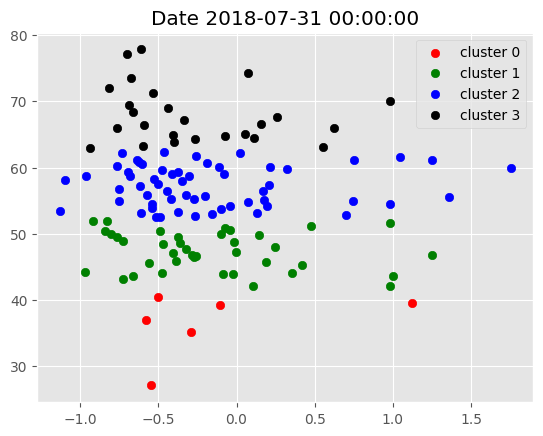

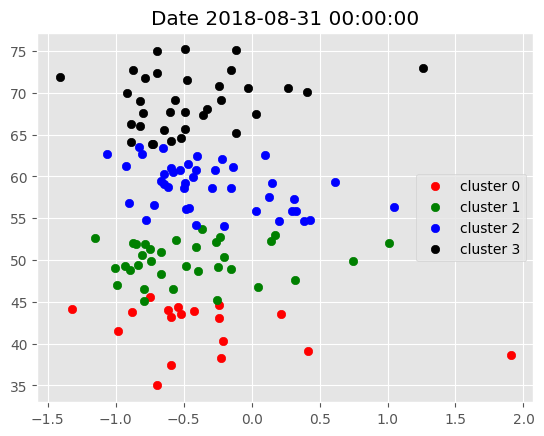

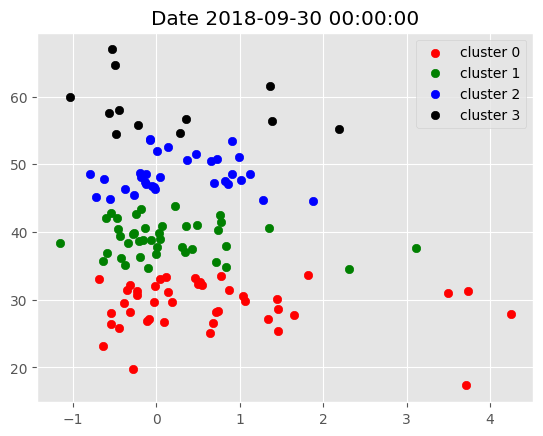

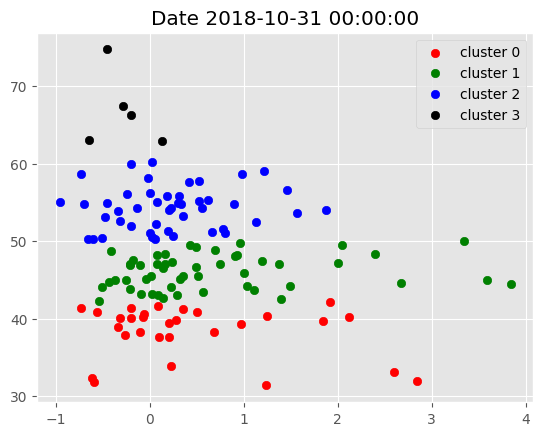

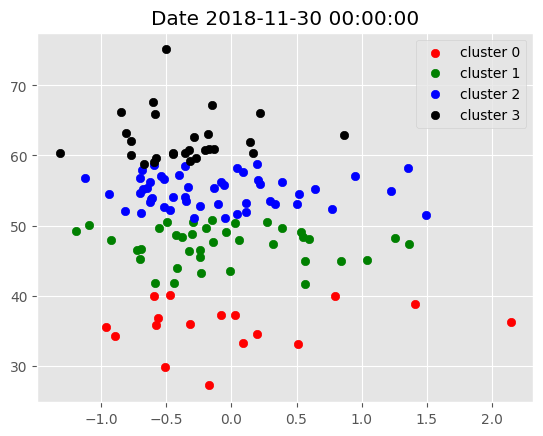

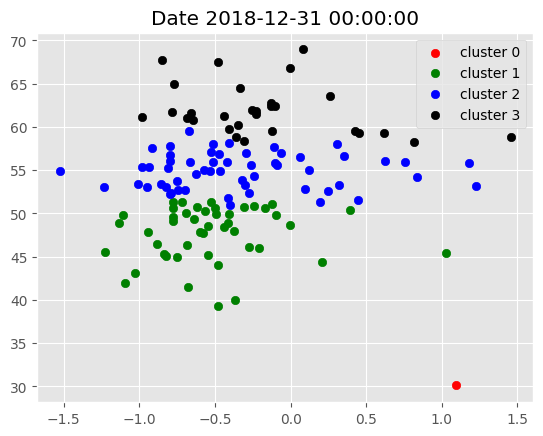

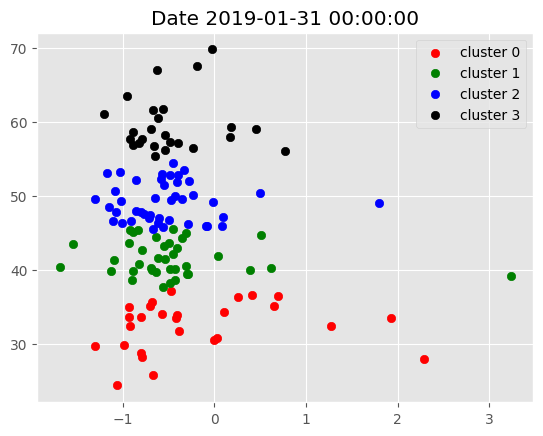

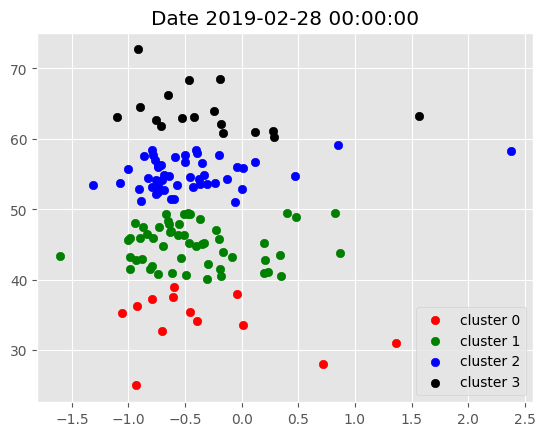

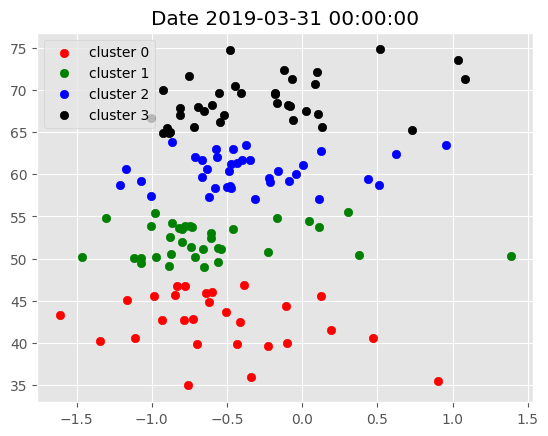

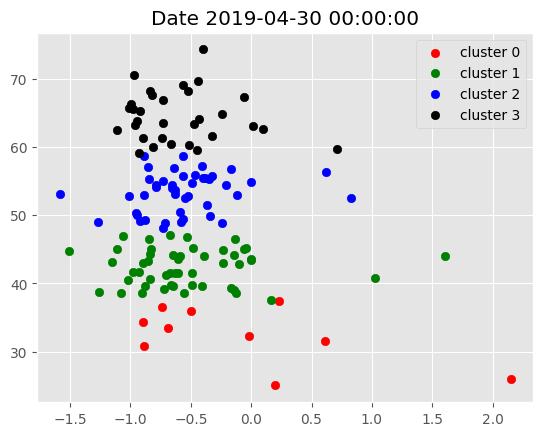

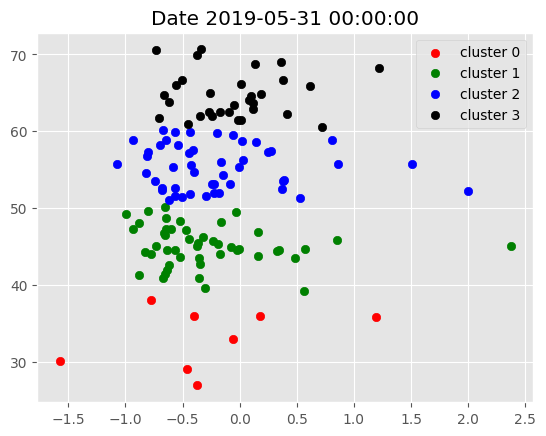

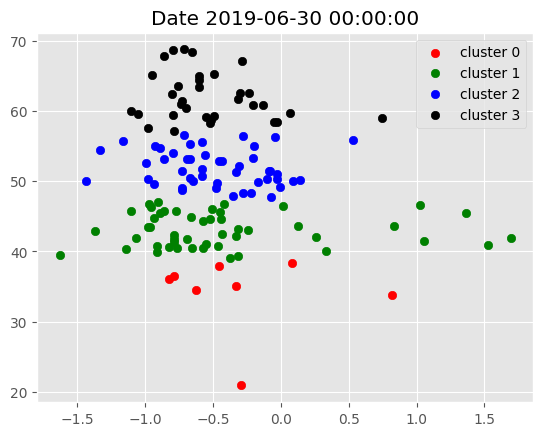

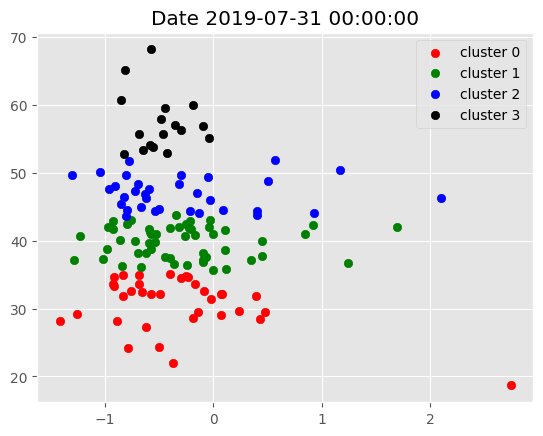

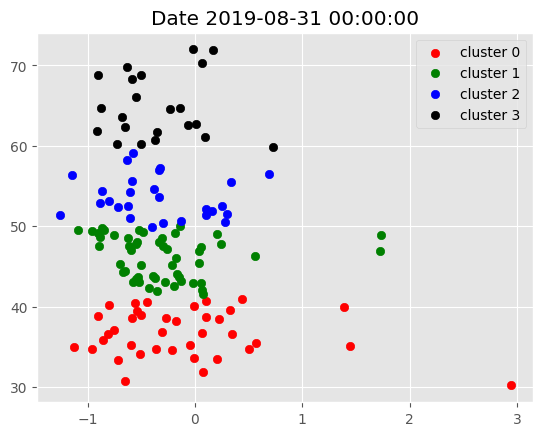

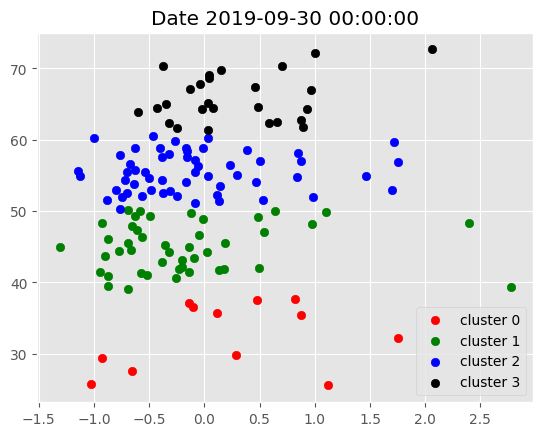

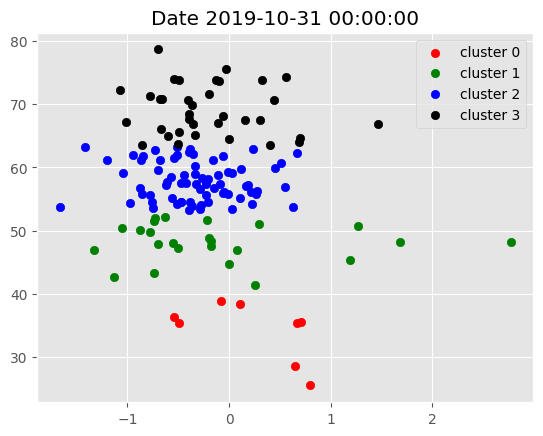

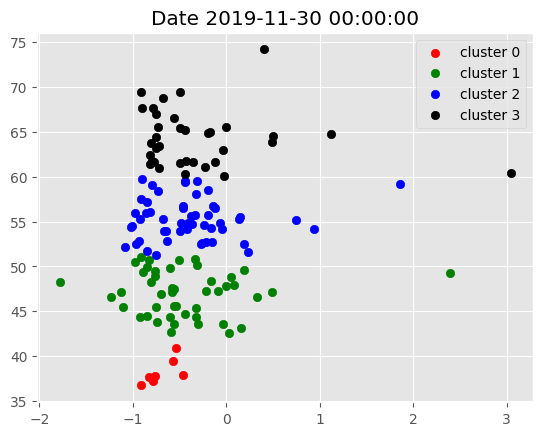

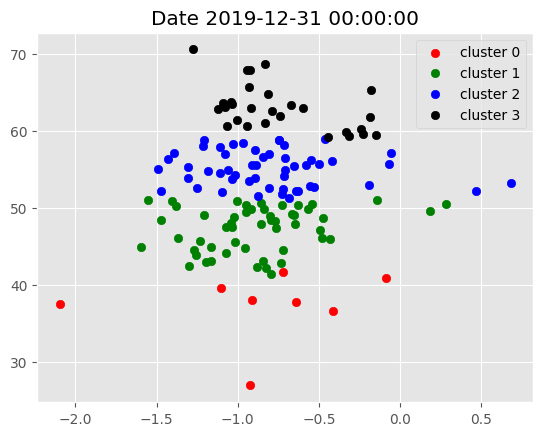

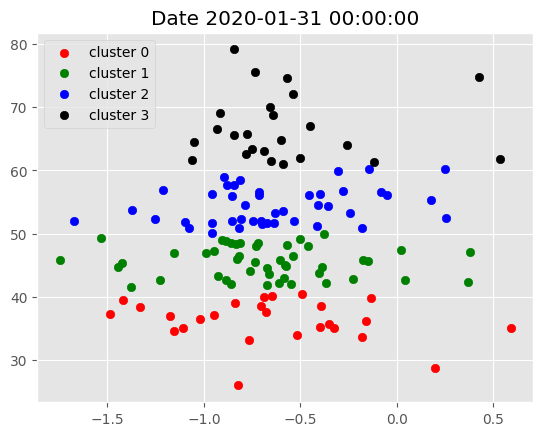

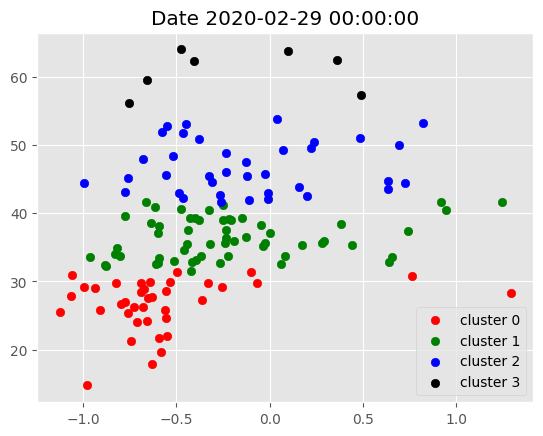

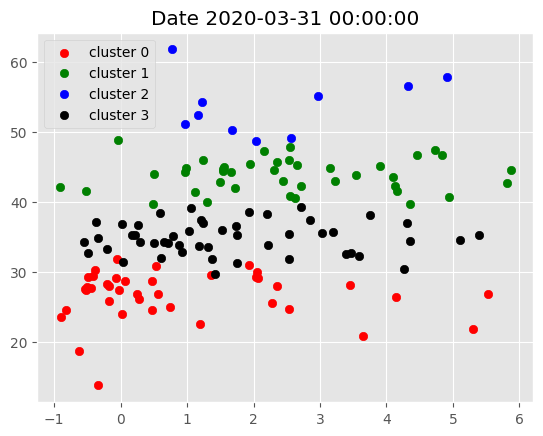

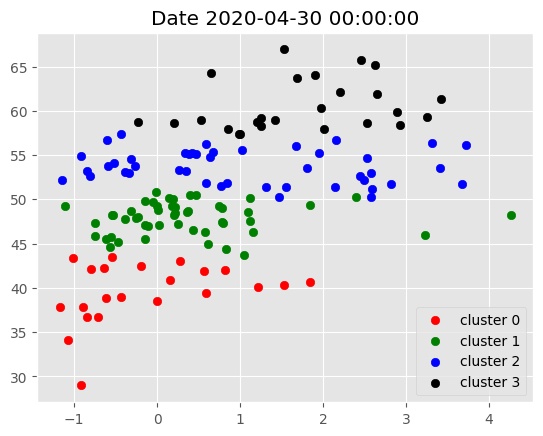

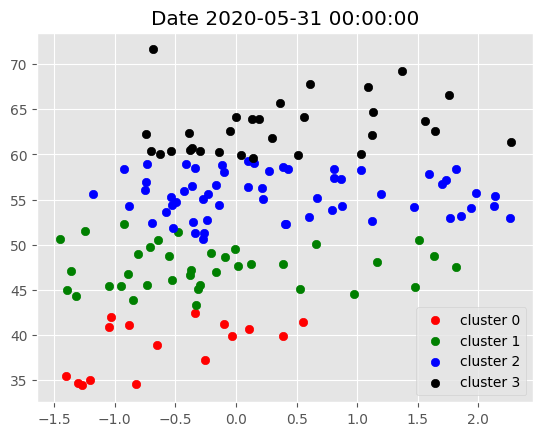

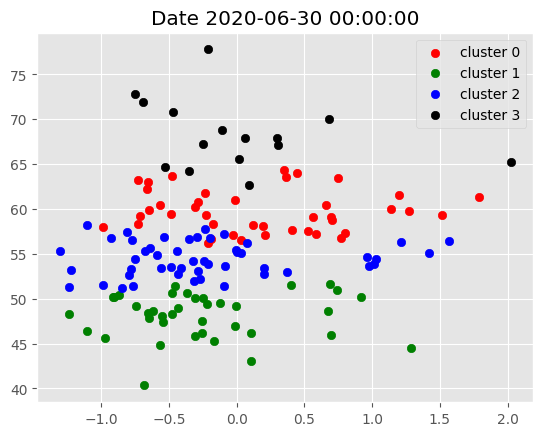

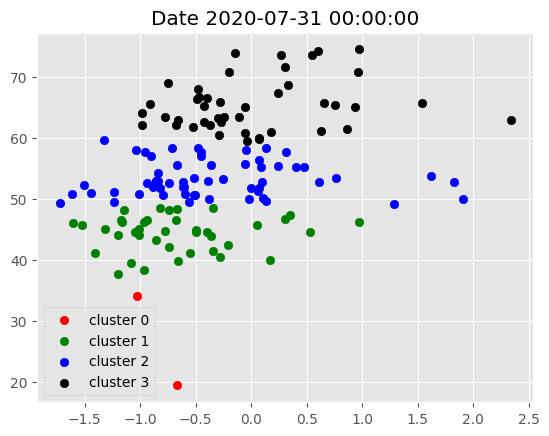

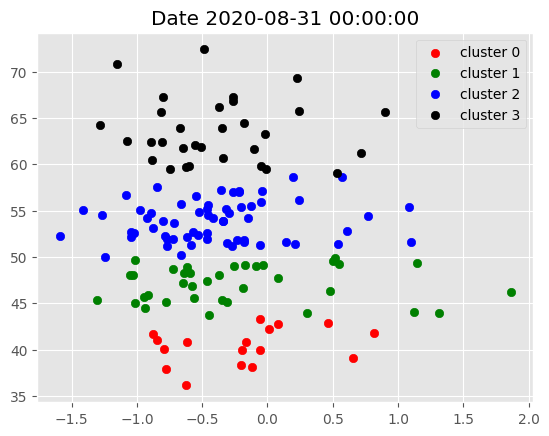

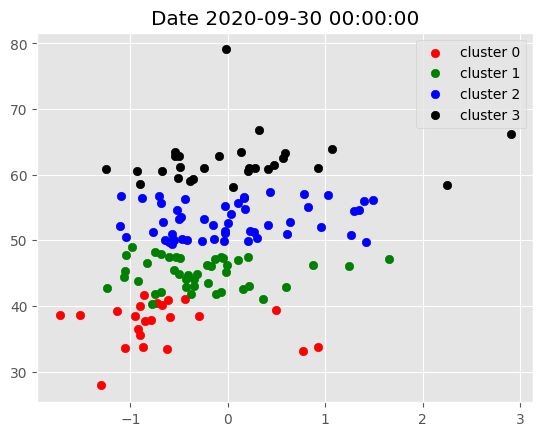

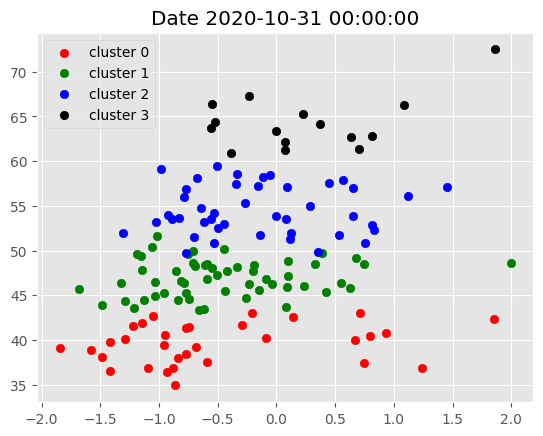

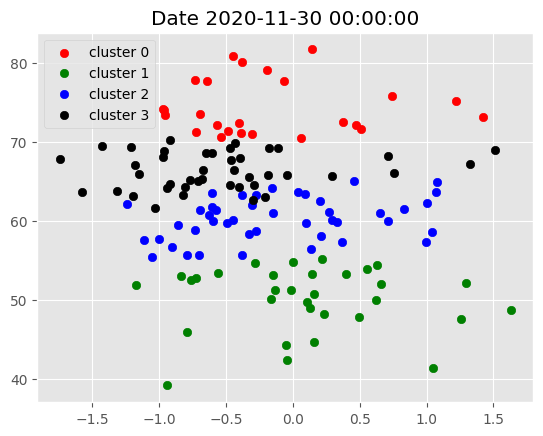

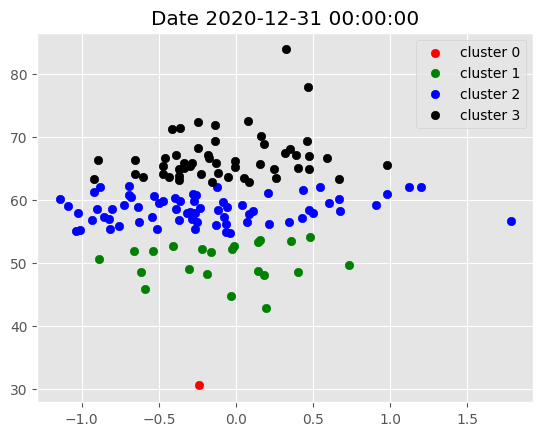

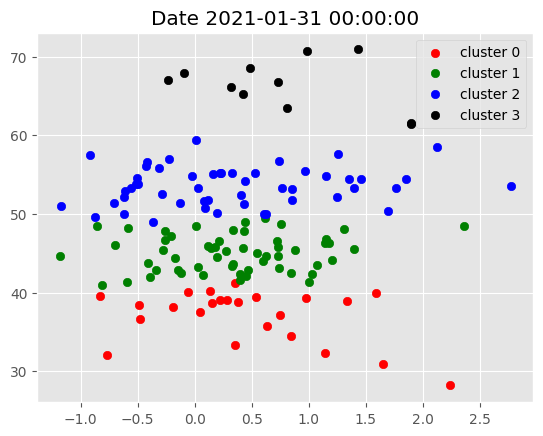

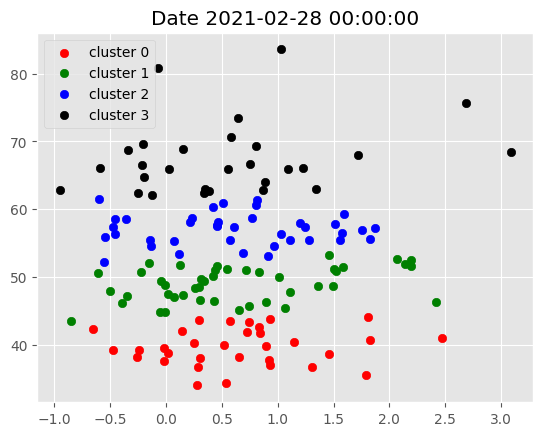

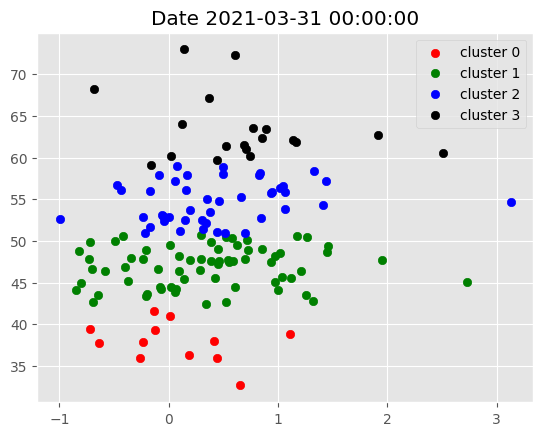

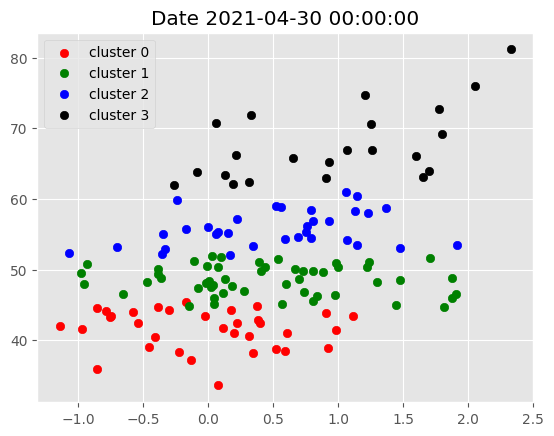

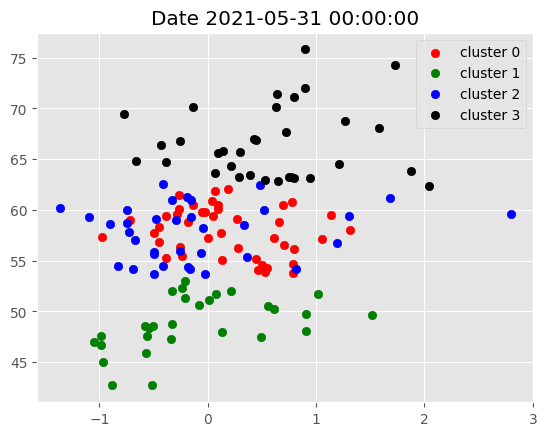

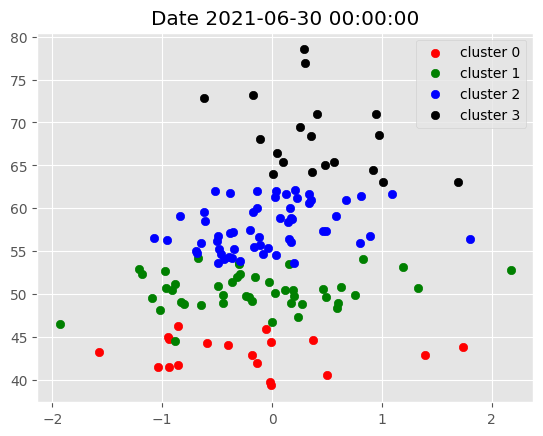

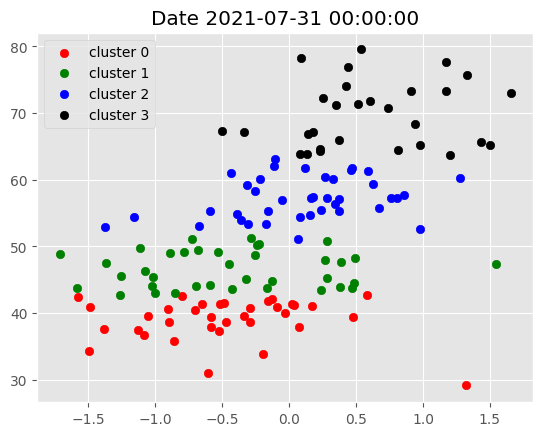

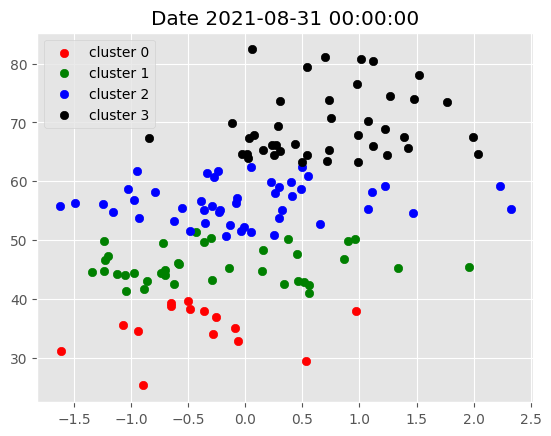

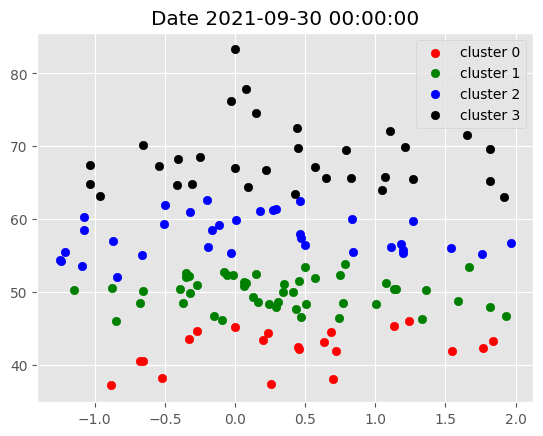

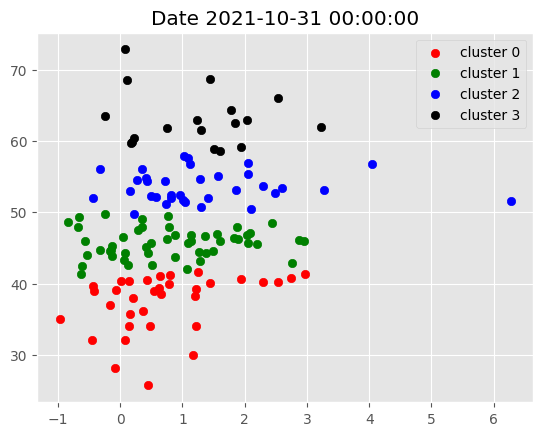

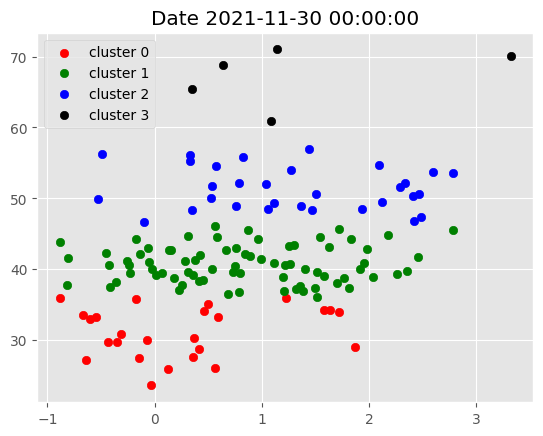

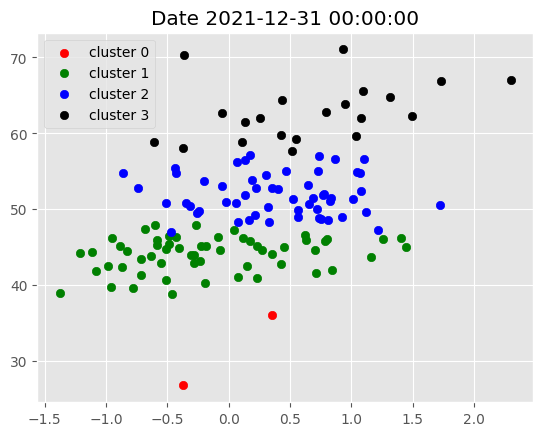

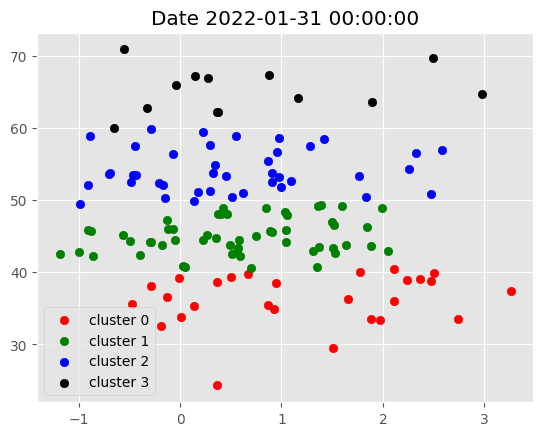

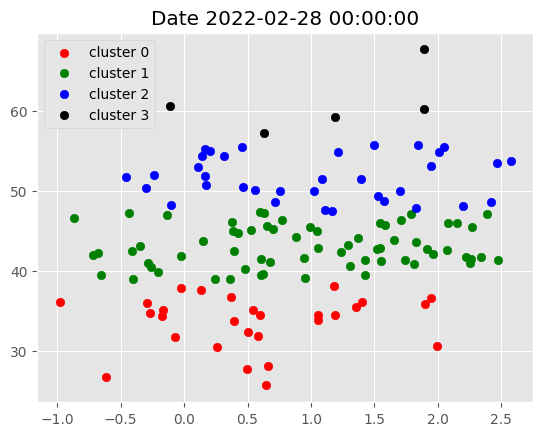

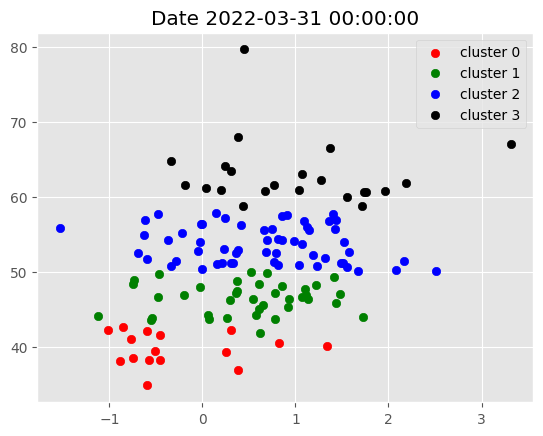

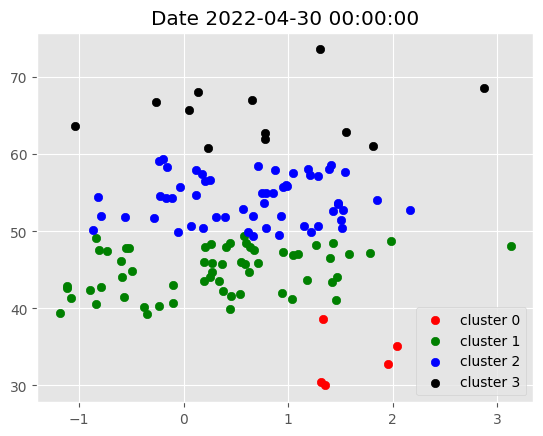

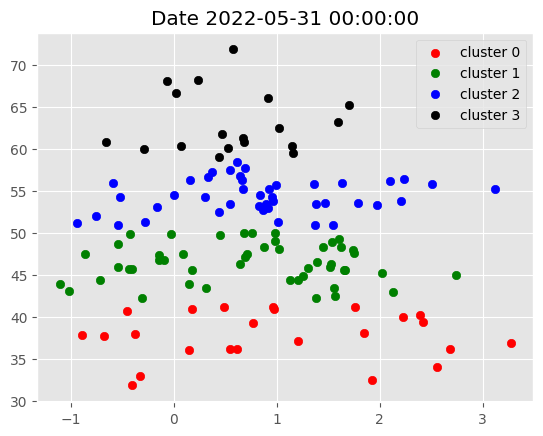

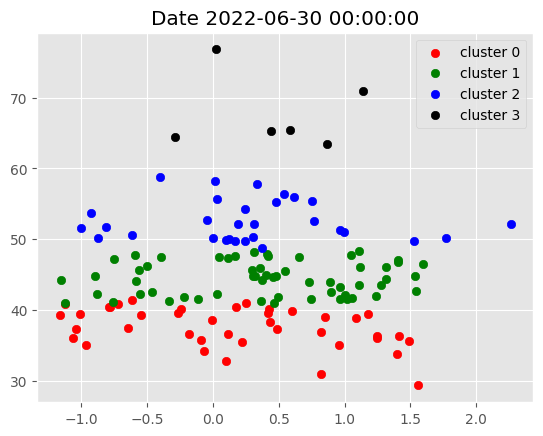

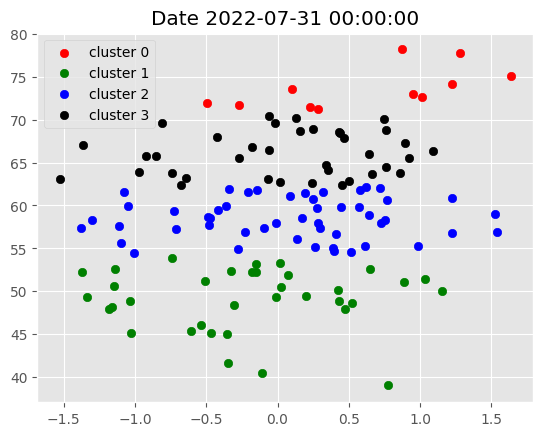

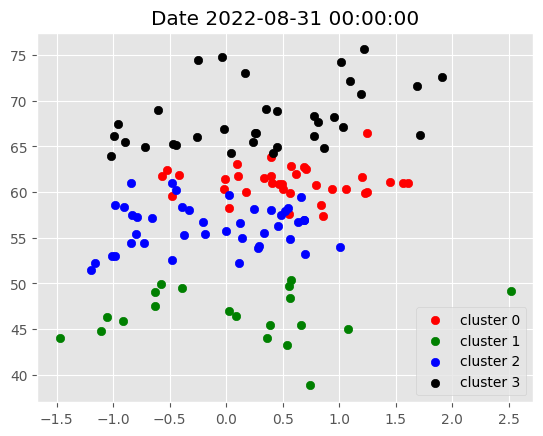

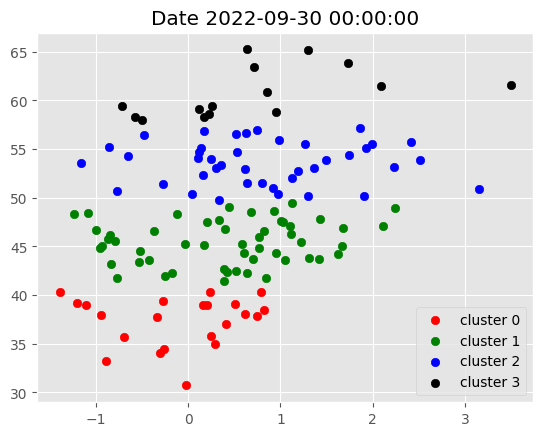

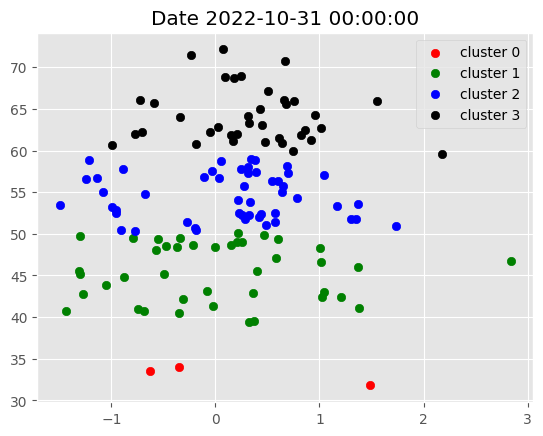

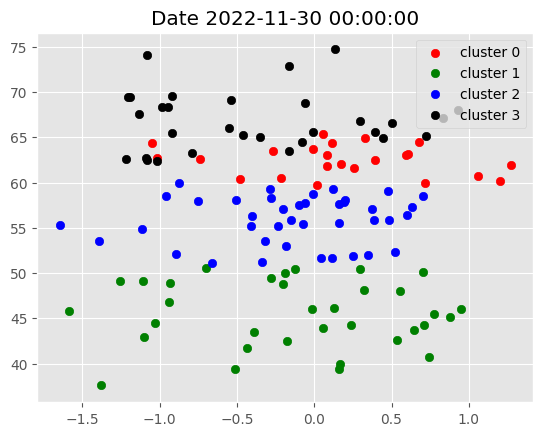

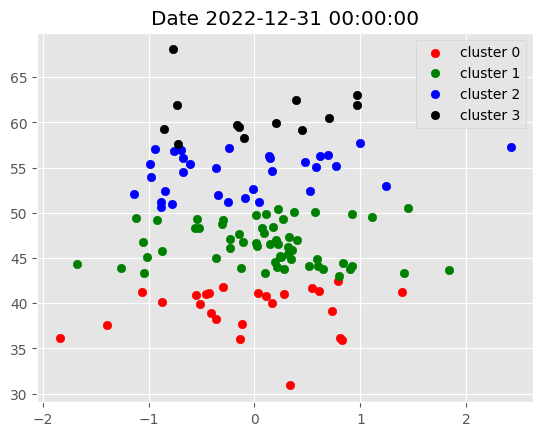

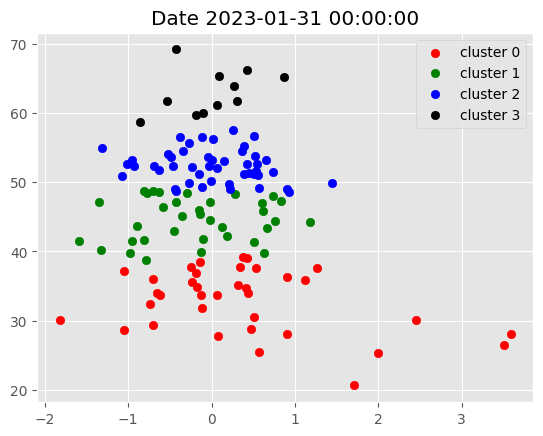

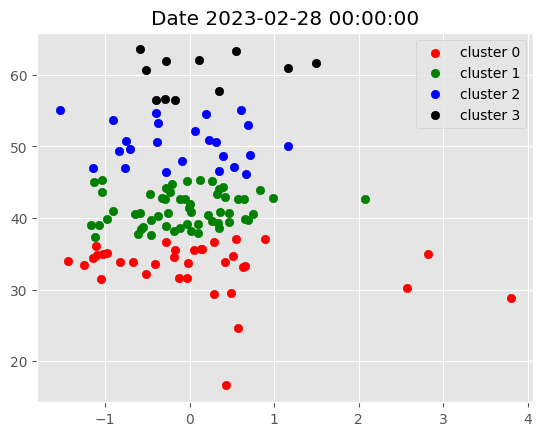

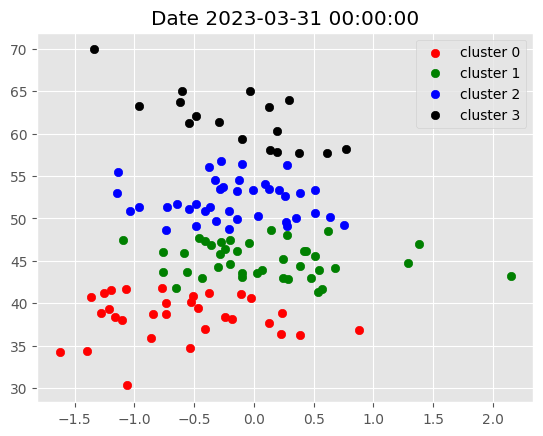

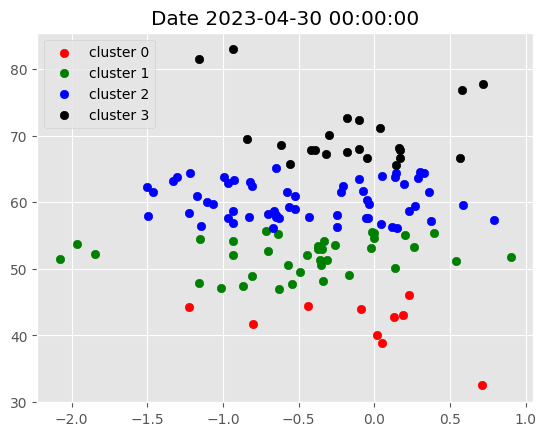

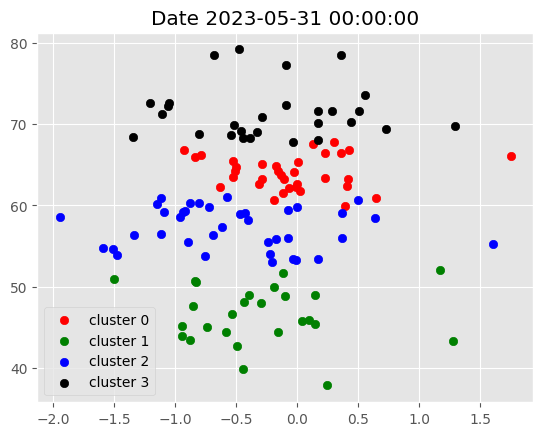

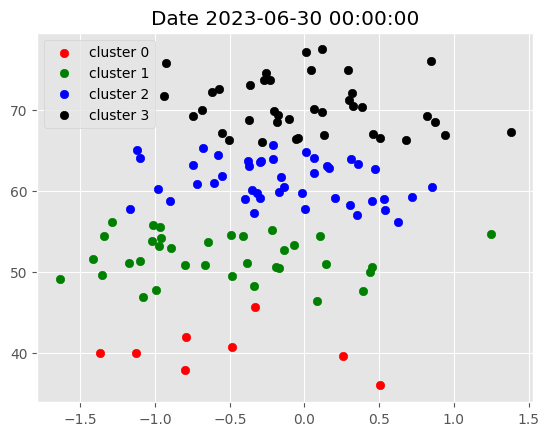

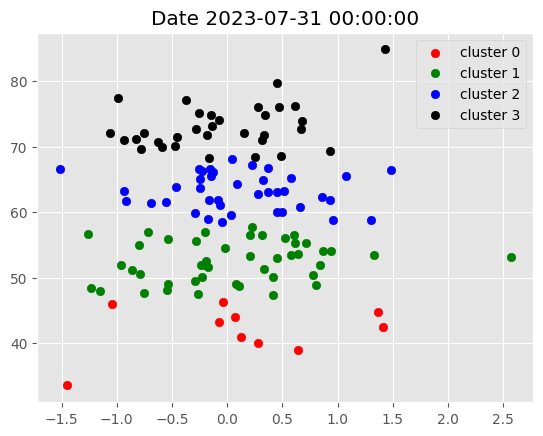

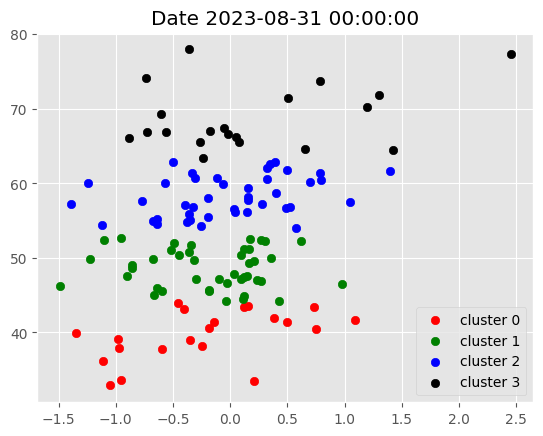

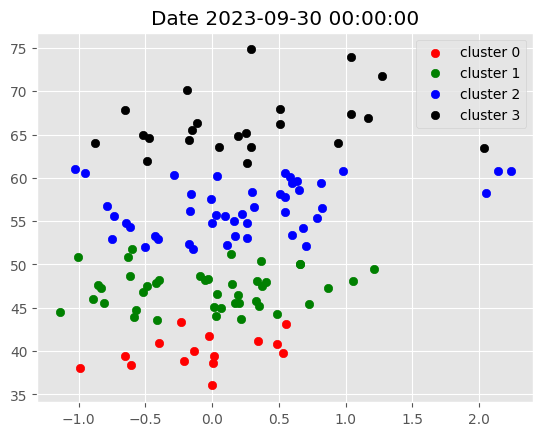

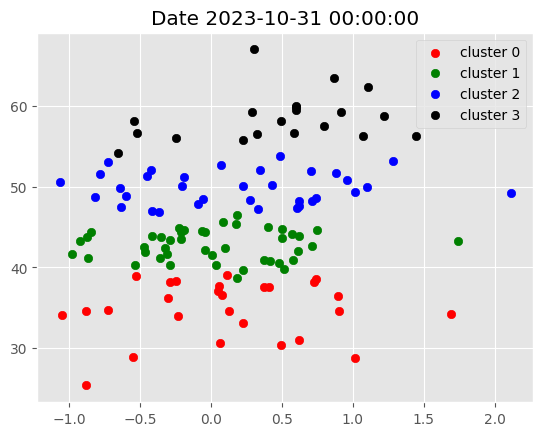

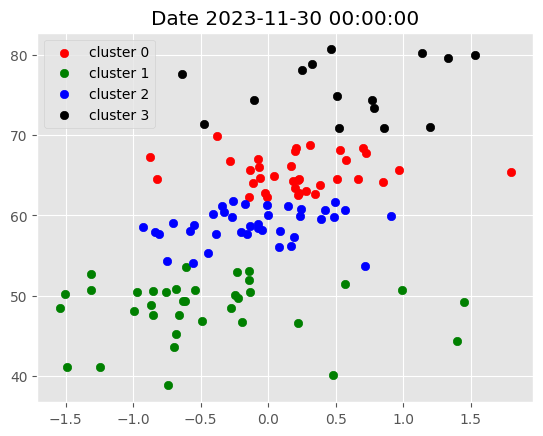

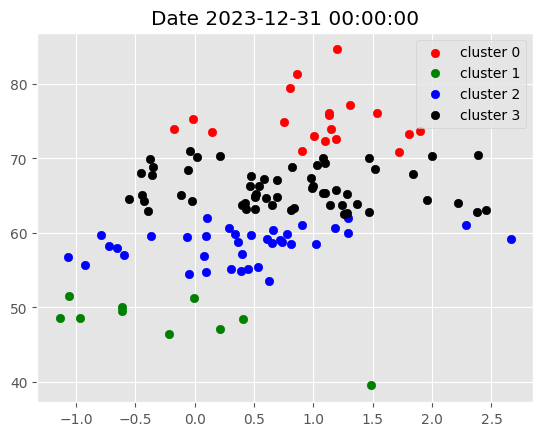

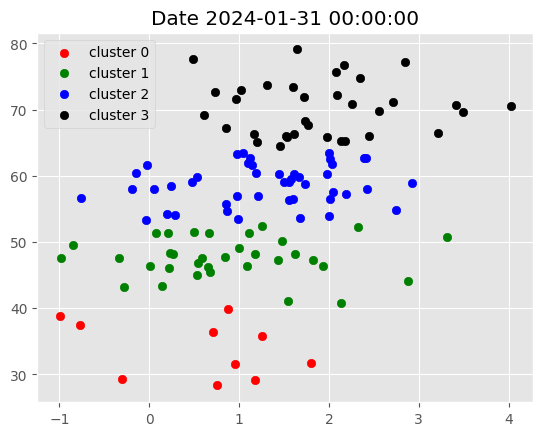

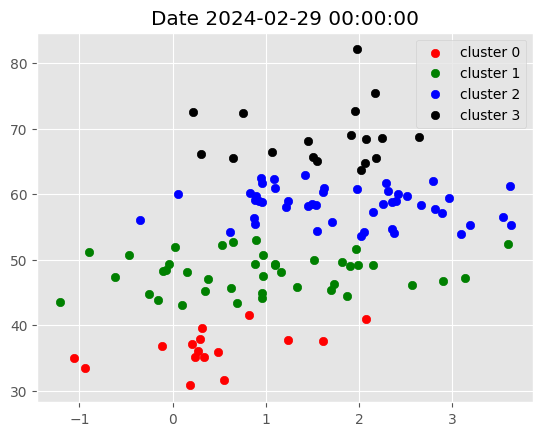

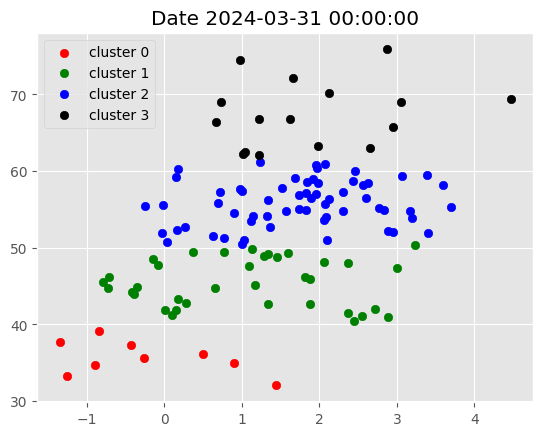

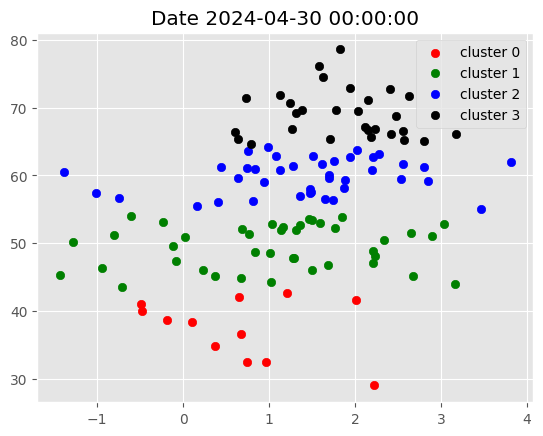

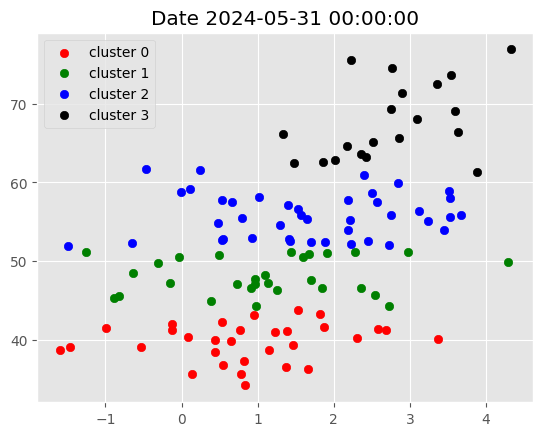

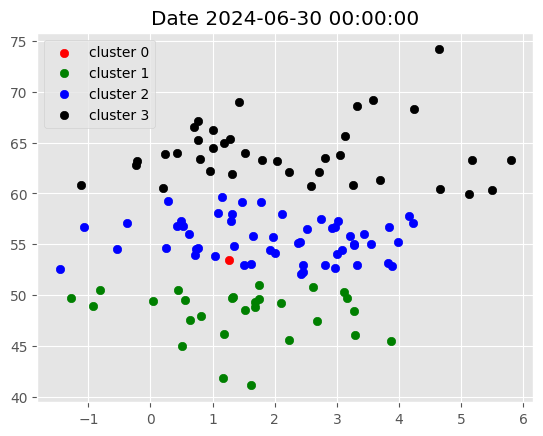

In [ ]:
# Set the 'ggplot' style for matplotlib plots
plt.style.use('ggplot')

# Iterate through unique dates in the multi-level index of the 'data' DataFrame
for date in data.index.get_level_values('date').unique().tolist():
    # Extract the subset of data for the current date
    subset_data = data.xs(date, level=0)

    # Set the plot title with the current date
    plt.title(f'Date {date}')

    # Plot clusters for the current subset of data using the plot_clusters function
    plot_clusters(subset_data)


Apply pre-defined centroids.

In [ ]:
# Define the target RSI values for clustering
target_rsi_values = [30, 45, 55, 70]

# Create an array to store the initial centroids with shape (number of target RSI values, number of features)
initial_centroids = np.zeros((len(target_rsi_values), 18))

# Set the RSI column in each initial centroid to the corresponding target RSI value
initial_centroids[:, 6] = target_rsi_values

# Display the resulting initial centroids array
initial_centroids


array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization
First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

In [ ]:
# Filter the 'data' DataFrame to include rows where the 'cluster' column has a value of 3
filtered_df = data[data['cluster'] == 3].copy()

# Reset the index of the filtered DataFrame to default integer index, keeping the date in a separate column
filtered_df = filtered_df.reset_index(level=1)

# Add one day to each date in the index
filtered_df.index = filtered_df.index + pd.DateOffset(1)

# Reset the index to default integer index and set a multi-level index using 'date' and 'ticker' columns
filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

# Get unique dates from the index of the filtered DataFrame
dates = filtered_df.index.get_level_values('date').unique().tolist()

# Create a dictionary to store fixed dates and associated tickers
fixed_dates = {}

# Iterate through unique dates in the index
for date in dates:
    # Extract the subset of data for the current date
    subset_data = filtered_df.xs(date, level=0)

    # Store the list of tickers associated with the current date in the dictionary
    fixed_dates[date.strftime('%Y-%m-%d')] = subset_data.index.tolist()

# Display the dictionary with fixed dates and associated tickers
fixed_dates


{'2018-08-01': ['ACC.NS',
  'ADANIENT.NS',
  'ADANIPOWER.NS',
  'AMBUJACEM.NS',
  'APOLLOTYRE.NS',
  'ASIANPAINT.NS',
  'BAJAJFINSV.NS',
  'BAJFINANCE.NS',
  'BANKBARODA.NS',
  'BATAINDIA.NS',
  'BRITANNIA.NS',
  'CANBK.NS',
  'DABUR.NS',
  'EXIDEIND.NS',
  'GAIL.NS',
  'HAVELLS.NS',
  'ICICIBANK.NS',
  'IGL.NS',
  'ITC.NS',
  'MARICO.NS',
  'MCX.NS',
  'PEL.NS',
  'PFC.NS',
  'RELIANCE.NS',
  'SBIN.NS'],
 '2018-09-01': ['ACC.NS',
  'ADANIENT.NS',
  'ADANIPOWER.NS',
  'APOLLOHOSP.NS',
  'AUROPHARMA.NS',
  'AXISBANK.NS',
  'BATAINDIA.NS',
  'DABUR.NS',
  'DIVISLAB.NS',
  'DLF.NS',
  'DRREDDY.NS',
  'GLENMARK.NS',
  'GMRINFRA.NS',
  'GODREJCP.NS',
  'HAVELLS.NS',
  'ICICIBANK.NS',
  'IDFCFIRSTB.NS',
  'ITC.NS',
  'JSWSTEEL.NS',
  'NTPC.NS',
  'ONGC.NS',
  'PEL.NS',
  'PETRONET.NS',
  'PIDILITIND.NS',
  'POWERGRID.NS',
  'SHREECEM.NS',
  'SRF.NS',
  'SUNPHARMA.NS',
  'TATACHEM.NS',
  'TCS.NS',
  'TECHM.NS',
  'ULTRACEMCO.NS',
  'UPL.NS',
  'WIPRO.NS'],
 '2018-10-01': ['AUROPHARMA.NS',
  '

Define portfolio optimization function
We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

Apply signle stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio).

In [ ]:
# Import necessary modules from PyPortfolioOpt library
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Define a function to optimize portfolio weights based on historical asset prices
def optimize_weights(prices, lower_bound=0):
    # Calculate historical expected returns using mean historical return method
    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)

    # Calculate covariance matrix using sample covariance method
    cov = risk_models.sample_cov(prices=prices, frequency=252)

    # Initialize EfficientFrontier object with expected returns, covariance matrix, and weight bounds
    ef = EfficientFrontier(expected_returns=returns, cov_matrix=cov, weight_bounds=(lower_bound, 0.1), solver='SCS')

    # Maximize Sharpe ratio to get optimal portfolio weights
    weights = ef.max_sharpe()

    # Clean the weights (rounding near-zero weights to zero)
    cleaned_weights = ef.clean_weights()

    return cleaned_weights


Download Fresh Daily Prices Data only for short listed stocks.

In [ ]:
# Extract unique ticker symbols from the index and convert them into a list
stocks = data.index.get_level_values('ticker').unique().tolist()

# Download historical stock data for the list of ticker symbols
# Start date is set to one year (12 months) before the earliest date in the dataset
# End date is set to the latest date in the dataset
new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

# Display or use the downloaded stock data stored in 'new_df' DataFrame
new_df


[*********************100%%**********************]  152 of 152 completed


Price         Adj Close                                           \
Ticker           ACC.NS  ADANIENT.NS ADANIGREEN.NS ADANIPORTS.NS   
Date                                                               
2017-07-31  1575.535400    73.950943           NaN    379.839874   
2017-08-01  1579.671753    75.184341           NaN    387.611298   
2017-08-02  1610.897095    76.122810           NaN    394.567230   
2017-08-03  1645.894653    73.870491           NaN    390.825439   
2017-08-04  1648.394531    74.004547           NaN    390.153809   
...                 ...          ...           ...           ...   
2024-06-24  2588.250000  3194.600098   1812.349976   1460.250000   
2024-06-25  2569.699951  3171.100098   1797.099976   1456.150024   
2024-06-26  2590.899902  3170.500000   1774.300049   1467.800049   
2024-06-27  2637.000000  3175.149902   1808.449951   1485.500000   
2024-06-28  2619.050049  3177.149902   1788.800049   1478.099976   

Price                                                                          \
Ticker     ADANIPOWER.NS AMBUJACEM.NS APOLLOHOSP.NS APOLLOTYRE.NS ASHOKLEY.NS   
Date                                                                            
2017-07-31     33.500000   229.042175   1225.814453    240.159729   89.715561   
2017-08-01     33.349998   226.996750   1234.382568    240.565277   90.985519   
2017-08-02     33.200001   233.477371   1243.875610    250.297821   89.592682   
2017-08-03     32.500000   238.294098   1234.139038    244.079819   89.223976   
2017-08-04     32.900002   242.979355   1224.938477    236.329803   89.469765   
...                  ...          ...           ...           ...         ...   
2024-06-24    738.450012   657.750000   6259.549805    499.149994  240.300003   
2024-06-25    725.299988   648.799988   6295.350098    519.250000  241.860001   
2024-06-26    719.900024   657.049988   6136.799805    517.750000  240.190002   
2024-06-27    715.700012   660.650024   6192.500000    517.549988  242.160004   
2024-06-28    718.599976   670.250000   6185.700195    541.900024  241.889999   

Price                     ...  Volume                                      \
Ticker     ASIANPAINT.NS  ...  UBL.NS ULTRACEMCO.NS UNIONBANK.NS   UPL.NS   
Date                      ...                                               
2017-07-31   1100.278564  ...  108734        198206      4245041  3031069   
2017-08-01   1087.492188  ...  212498        243417      3829223  2553111   
2017-08-02   1083.987671  ...  152739        132722      6284203  1427100   
2017-08-03   1085.503052  ...   90500        195349      7698675  1421898   
2017-08-04   1096.110840  ...  123891        171562      3614231  1175566   
...                  ...  ...     ...           ...          ...      ...   
2024-06-24   2896.050049  ...  178548        276148     19720757  5572012   
2024-06-25   2858.449951  ...  550763        562075     14819259  1985056   
2024-06-26   2863.350098  ...  420755        793197     17100052  2354064   
2024-06-27   2880.850098  ...  186125       2339734     15516200  1627135   
2024-06-28   2917.050049  ...  108371        684790     17791152  1535016   

Price                                                                        
Ticker        VEDL.NS VOLTAS.NS  WIPRO.NS YESBANK.NS   ZEEL.NS ZYDUSLIFE.NS  
Date                                                                         
2017-07-31    6227981    769126   3400540   21767735   1133189       280081  
2017-08-01    6301465   3099028   5380227   14552820   1854664       913963  
2017-08-02    5422178   6316855   3234817   10065875    818289       338367  
2017-08-03    5892361   2375385   4861098   14988025   1906088       751793  
2017-08-04   10101816    961460   3398028   14304925   3433629       859002  
...               ...       ...       ...        ...       ...          ...  
2024-06-24    7716484   2870856   4967259  111001042  11607091       861316  
2024-06-25    8309097    856073   4629105  133033834 

Calculate daily returns for each stock which could land up in our portfolio.

Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

Calculated each day portfolio return.

In [ ]:
from pandas.tseries.offsets import MonthEnd

# Calculate log returns of adjusted close prices
returns_dataframe = np.log(new_df['Adj Close']).diff()

# Create an empty DataFrame to store portfolio returns
portfolio_df = pd.DataFrame()

# Loop through each start date in the 'fixed_dates' dictionary
for start_date in fixed_dates.keys():
    try:
        # Calculate the end date for optimization as the end of the same month
        end_date = (pd.to_datetime(start_date) + MonthEnd(0)).strftime('%Y-%m-%d')

        # Get the list of tickers for this start date
        cols = fixed_dates[start_date]

        # Calculate the start and end dates for optimization (12 months prior to start date)
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

        # Extract the relevant data for optimization
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, 'Adj Close'][cols]

        # Try to optimize weights using a custom function 'optimize_weights'
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1 / (len(optimization_df.columns) * 2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            # If optimization fails, print a message and continue with equal weights
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')

        # If optimization fails or is not attempted, use equal weights
        if not success:
            weights = pd.DataFrame([1 / len(optimization_df.columns) for _ in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T

        # Filter returns data for the selected start and end dates
        temp_df = returns_dataframe.loc[start_date:end_date]

        # Merge returns and weights dataframes and calculate weighted returns
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0) \
            .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                   left_index=True,
                   right_index=True) \
            .reset_index().set_index(['Date', 'Ticker']).unstack().stack()

        # Set index names and calculate weighted returns
        temp_df.index.names = ['date', 'ticker']
        temp_df['weighted_return'] = temp_df['return'] * temp_df['weight']

        # Calculate strategy return by summing weighted returns
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        # Concatenate the strategy return dataframe to the portfolio dataframe
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        # Handle any exceptions that might occur during the process
        print(e)


Max Sharpe Optimization failed for 2018-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2022-07-01, Continuing with Equal-Weights
'return'


In [ ]:
# Remove duplicate rows from the 'portfolio_df' DataFrame based on all columns
portfolio_df = portfolio_df.drop_duplicates()

# Display or use the cleaned DataFrame
portfolio_df


,Strategy Return
date,
2018-08-01,0.005996
2018-08-02,-0.009250
2018-08-03,0.005963
2018-08-06,0.000550
2018-08-07,0.002189
...,...
2024-06-24,0.008070
2024-06-25,-0.004785
2024-06-26,-0.002758


Visualize Portfolio returns and compare to NIFTY500 returns.

In [ ]:
# Download historical data for the Motilal Oswal NIFTY 500 ETF (ticker symbol 'MONIFTY500.NS')
spy = yf.download(tickers=' MONIFTY500.NS',
                  start='2015-01-01',
                  end=dt.date.today())

# Calculate logarithmic returns for 'SPY' and drop NaN values
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'Nifty 500 Buy&Hold'}, axis=1)

# Merge 'spy_ret' DataFrame with 'portfolio_df' DataFrame based on index
portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

# Display or use the merged DataFrame 'portfolio_df'
portfolio_df


[*********************100%%**********************]  1 of 1 completed


,Strategy Return,Nifty 500 Buy&Hold
2023-10-09,-0.008887,-0.011528
2023-10-10,0.016192,0.006357
2023-10-11,0.004386,0.004598
2023-10-12,0.005143,0.002291
2023-10-13,0.003143,0.000572
...,...,...
2024-06-24,0.008070,0.002228
2024-06-25,-0.004785,0.001779
2024-06-26,-0.002758,0.001775
2024-06-27,0.003198,0.001772


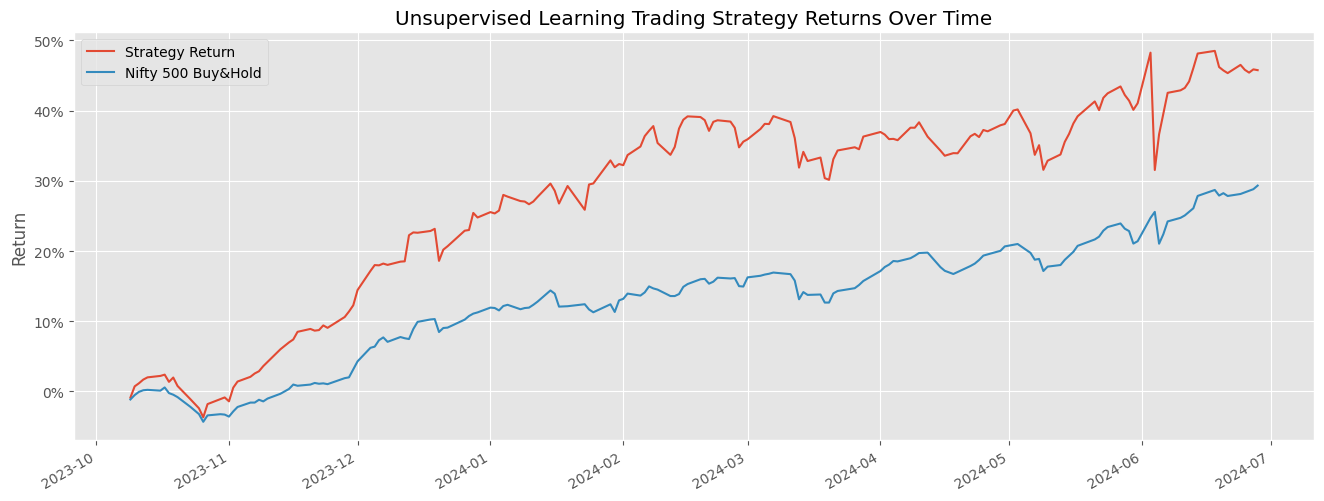

In [ ]:
import matplotlib.ticker as mtick

# Set the style of the plot (ggplot style)
plt.style.use('ggplot')

# Calculate the cumulative return of the portfolio using logarithmic returns
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()) - 1

# Plot the cumulative return until a specific date ('2023-09-29' in this case)
portfolio_cumulative_return[:'2024-07-01'].plot(figsize=(16, 6))

# Set plot title and axis labels
plt.title('Unsupervised Learning Trading Strategy Returns Over Time')
plt.ylabel('Return')

# Set y-axis ticks to display percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Display the plot
plt.show()
